<a href="https://colab.research.google.com/github/Jeanne012/SDS/blob/main/SDS_step_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Database download
url = 'https://www.qogdata.pol.gu.se/data/qog_ei_ts_sept21.csv'
url2 = 'https://raw.githubusercontent.com/Jeanne012/SDS/main/DP_LIVE_26102023123750017.csv'
df = pd.read_csv(url)
df_2 = pd.read_csv(url2)

In [ ]:
#describe de QOG database
#df.describe()
df.head()


Unnamed: 0        cname  ccode  year    cname_qog  ccode_qog ccodealp  \
0           1  Afghanistan    4.0  1946  Afghanistan          4      AFG   
1           2  Afghanistan    4.0  1947  Afghanistan          4      AFG   
2           3  Afghanistan    4.0  1948  Afghanistan          4      AFG   
3           4  Afghanistan    4.0  1949  Afghanistan          4      AFG   
4           5  Afghanistan    4.0  1950  Afghanistan          4      AFG   

  ccodealp_year  ccodecow  ccodevdem  ... wdi_precip wdi_tpa  wvs_ameop  \
0         AFG46     700.0       36.0  ...        NaN     NaN        NaN   
1         AFG47     700.0       36.0  ...        NaN     NaN        NaN   
2         AFG48     700.0       36.0  ...        NaN     NaN        NaN   
3         AFG49     700.0       36.0  ...        NaN     NaN        NaN   
4         AFG50     700.0       36.0  ...        NaN     NaN        NaN   

   wvs_ceom  wvs_deop  wvs_epmip  wvs_epmpp  wvs_imeop  wvs_pedp  wvs_ploem  
0       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
1       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
2       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
3       NaN       NaN        NaN        NaN        NaN       NaN        NaN  
4       NaN       NaN        NaN        NaN        NaN       NaN        NaN  

[5 rows x 415 columns]

In [ ]:
df_2.head()

LOCATION INDICATOR SUBJECT MEASURE FREQUENCY  TIME  Value Flag Codes
0      AUS    TAXENV    ENRG  PC_GDP         A  1994   1.86        NaN
1      AUS    TAXENV    ENRG  PC_GDP         A  1995   1.97        NaN
2      AUS    TAXENV    ENRG  PC_GDP         A  1996   1.89        NaN
3      AUS    TAXENV    ENRG  PC_GDP         A  1997   2.14        NaN
4      AUS    TAXENV    ENRG  PC_GDP         A  1998   2.17        NaN

In [ ]:
#Select the data
df_data = df.loc[:,[ 'cname_qog', 'edgar_co2pc','year','ccodealp' ]]

#rename our key variables, dependent and independent variables
df_data = df_data.rename(columns={'cname_qog': 'country'})
df_data = df_data.rename (columns= {'edgar_co2pc': 'CO2 per capita'})
df_data.head()

country  CO2 per capita  year ccodealp
0  Afghanistan             NaN  1946      AFG
1  Afghanistan             NaN  1947      AFG
2  Afghanistan             NaN  1948      AFG
3  Afghanistan             NaN  1949      AFG
4  Afghanistan             NaN  1950      AFG

In [ ]:
df_data_2 = df_2.loc[:,[ 'LOCATION', 'TIME', 'Value', 'SUBJECT']]
df_data_2 = df_data_2.rename(columns={'Value': 'Env tax'})

In [ ]:
df_data_2.head()

LOCATION  TIME  Env tax SUBJECT
0      AUS  1994     1.86    ENRG
1      AUS  1995     1.97    ENRG
2      AUS  1996     1.89    ENRG
3      AUS  1997     2.14    ENRG
4      AUS  1998     2.17    ENRG

In [ ]:
df_data_2 = df_data_2[df_data_2['SUBJECT'] == 'TOT']
df_data_2.head()

LOCATION  TIME  Env tax SUBJECT
28      AUS  1994     2.46     TOT
29      AUS  1995     2.88     TOT
30      AUS  1996     2.80     TOT
31      AUS  1997     3.02     TOT
32      AUS  1998     3.11     TOT

In [ ]:
df_new = pd.merge(df_data, df_data_2, left_on=['ccodealp', 'year'], right_on=['LOCATION', 'TIME'])
df_new = df_new.drop('TIME', axis=1)
df_new.head()

country  CO2 per capita  year ccodealp LOCATION  Env tax SUBJECT
0  Albania        1.045635  2000      ALB      ALB     0.90     TOT
1  Albania        1.112085  2001      ALB      ALB     0.95     TOT
2  Albania        1.292060  2002      ALB      ALB     1.04     TOT
3  Albania        1.360850  2003      ALB      ALB     0.79     TOT
4  Albania        1.432008  2004      ALB      ALB     0.84     TOT

In [ ]:
df_new.describe()

CO2 per capita         year      Env tax
count     4491.000000  4993.000000  4993.000000
mean         5.142185  2008.042059     4.130074
std          5.222789     7.494859     4.025555
min          0.034407  1994.000000   -12.140000
25%          0.991398  2002.000000     1.200000
50%          3.629734  2008.000000     2.670000
75%          8.220510  2014.000000     6.440000
max         29.154586  2020.000000    31.540000

In [ ]:
#Information on the variable Environmentally related tax revenue
description = df_new['Env tax'].describe()
missing_values = df_new['Env tax'].isnull().sum()
print(description)
print(f"Missing values: {missing_values}")

count    4993.000000
mean        4.130074
std         4.025555
min       -12.140000
25%         1.200000
50%         2.670000
75%         6.440000
max        31.540000
Name: Env tax, dtype: float64
Missing values: 0


The Env tax variable has only limited observations and seems to have only a lot of missing values

In [ ]:
#our data starts in 1994 and stops in 2019 for the environmental tax and the CO2 emission per capita.
df_data_group= df_new.groupby('year').count().loc[:, ['Env tax', 'CO2 per capita']]
df_data_group = df_data_group.loc[(df_data_group != 0).any(axis=1)]
df_data_group

Env tax  CO2 per capita
year                         
1994      121             113
1995      138             128
1996      140             130
1997      140             130
1998      145             133
1999      145             133
2000      169             157
2001      175             163
2002      179             167
2003      181             169
2004      183             171
2005      194             182
2006      198             184
2007      198             184
2008      200             188
2009      201             189
2010      208             196
2011      210             198
2012      210             198
2013      210             198
2014      210             198
2015      208             196
2016      208             196
2017      208             198
2018      208             198
2019      204             194
2020      202               0

In [ ]:
#Print the countries that have at least one observation equal to zero for the column 'Env tax'. Hence, the observations equal to zero may simply be missing values.
Env_tax_zero_countries = list(df_new.loc[df_new['Env tax'] == 0, 'country'].unique())
print('The countries for which the Environmental related tax revenu is equal to zero are:', ', '.join(Env_tax_zero_countries))

The countries for which the Environmental related tax revenu is equal to zero are: Cambodia, Congo, Fiji, Mozambique, Thailand, Venezuela


In [ ]:
#Print the countries that have at least one observation less than zero for the column 'Env tax'.
Env_tax_negative_countries = list(df_new.loc[df_new['Env tax'] < 0, 'country'].unique())
print('The countries for which the Environmental related tax revenue is negative are:', ', '.join(Env_tax_negative_countries))

The countries for which the Environmental related tax revenue is negative are: Mexico


In [ ]:
#create a new data frame only from 1994 to 2019 and for which the variable 'Env tax' is not missing
df_new = df_new[(df_new['year'] >= 1994) & (df_new['year'] <= 2019) & ~df_new['Env tax'].isnull() & ~df_new['CO2 per capita'].isnull()].reset_index(drop=True)
#df_new = df_data[(df_data['year'] >= 1994) & (df_data['year'] <= 2018) & ~df_data['Env tax'].isnull()].reset_index(drop=True)

#Based on the new data frame created above, delete the observations for 'Env tax' that is negative or zero.
df_new = df_new[df_new['Env tax'] != 0]
df_new = df_new[df_new['Env tax'] > 0]

df_new.describe()

In [ ]:
df_new.groupby(['country']).size().reset_index(name='counts')

country  counts
0          Albania       9
1        Argentina      52
2        Australia      52
3          Austria      52
4       Bangladesh      40
..             ...     ...
95  United Kingdom      52
96   United States      52
97         Uruguay      52
98       Venezuela      34
99         Vietnam      34

[100 rows x 2 columns]

In [ ]:
#Map of countries with the number of observations
df_map = df_new.groupby(['ccodealp']).size().reset_index(name='Number of observations')
fig = px.choropleth(df_map,
                    locations='ccodealp',
                    locationmode='ISO-3',
                    color='Number of observations',
                    hover_name='ccodealp',
                    title = 'Number of Observations by Country',
                    color_continuous_scale='Plasma')
fig.show()

In [ ]:
#Univariate analysis (Tasting and preparing the ingredients)
df_new.describe()

CO2 per capita         year      Env tax
count     4340.000000  4340.000000  4340.000000
mean         5.247724  2007.538249     4.291419
std          5.268802     7.246820     4.107385
min          0.034407  1994.000000     0.010000
25%          1.044752  2002.000000     1.280000
50%          3.705729  2008.000000     2.730000
75%          8.384052  2014.000000     6.640000
max         29.154586  2019.000000    31.540000

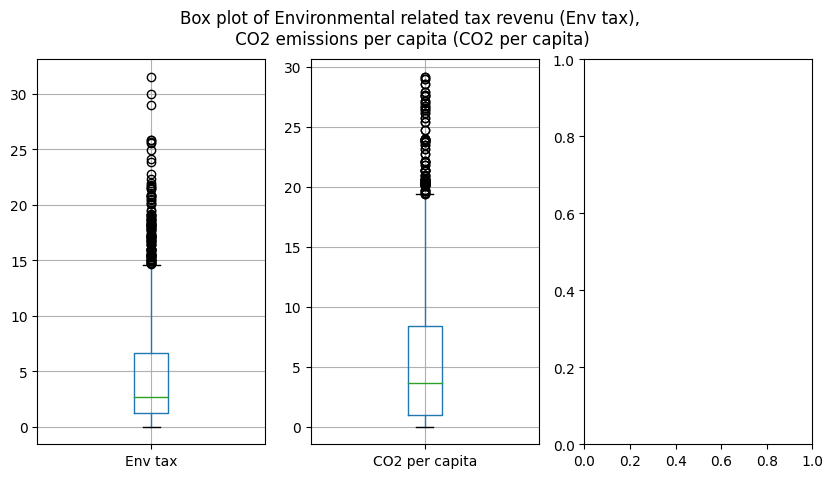

In [ ]:
#Create a boxplot
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
df_new.boxplot('Env tax', ax=ax[0])
df_new.boxplot('CO2 per capita', ax=ax[1])
plt.suptitle('Box plot of Environmental related tax revenu (Env tax), \n CO2 emissions per capita (CO2 per capita) ')
plt.show()

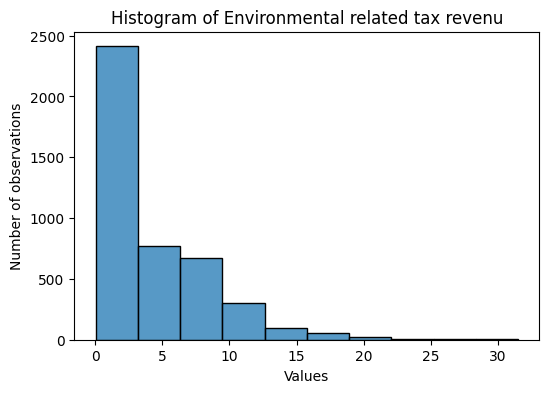

In [ ]:
#Let's first variable Environmental related tax revenu (Env tax)
#We can plot a histogram of the variable Env Tax
plt.figure(figsize=(6, 4))
sns.histplot(data=df_new, x='Env tax', bins=10)
plt.title('Histogram of Environmental related tax revenu')
plt.xlabel('Values')
plt.ylabel('Number of observations')
plt.show()

In [ ]:
df_new['Env tax'].describe()

count    4340.000000
mean        4.291419
std         4.107385
min         0.010000
25%         1.280000
50%         2.730000
75%         6.640000
max        31.540000
Name: Env tax, dtype: float64

In [ ]:
#The variable does not look very skewed, but we can still check the skewness. As a result, the skewness is 1.619.
Env_tax_skewness = df_new['Env tax'].skew()
print(f'The skewness of the Environmental tax is: {Env_tax_skewness:0.3f} ')


The skewness of the Environmental tax is: 1.619 


For the variable Environmentally related tax revenue (% total tax revenue) (Env tax) we do not need to log transform it. For our "selected sample" dataframe, we removed the observations for which 'Env tax' is equal to zero.
--> Finalize our exploration of the Env tax by checking the geographical patterns and the evolution through time of the variable

In [ ]:
#A map of the average 'Env tax' for each country (average of all years).each country's average 'Env tax'
df_map = df_new.groupby('ccodealp')['Env tax'].mean().reset_index()
fig = px.choropleth(df_map,
                    locations='ccodealp',
                    locationmode='ISO-3',
                    color='Env tax',
                    hover_name='ccodealp',
                    color_continuous_scale='algae')
fig.update_layout(title={'text': 'Average of Environmental related tax revenu',
                                   'y':0.95,
                                   'x':0.5,
                                   'xanchor': 'center',
                                   'yanchor': 'top'})
fig.show()

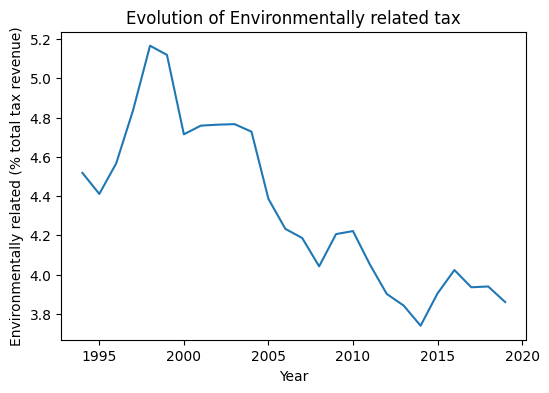

In [ ]:
#Plot the evolution of the Env tax
df_mean_Env_tax = df_new.groupby('year')['Env tax'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.plot(df_mean_Env_tax['year'], df_mean_Env_tax['Env tax'], linestyle='-')
plt.title('Evolution of Environmentally related tax')
plt.xlabel('Year')
plt.ylabel('Environmentally related (% total tax revenue)')
plt.show()

Why does it decrease?
Check general tendency of lower tax?

Let's explore our second variable, the CO2 emissions per capita.

In [ ]:
#Let's plot a histogram and check the skewness.
def histogram_skewness(df, col, title):
    '''This function plots a histogram of the column "col" of the dataframe "df"
    and returns the skewness.'''
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=10)
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Number of observations')
    plt.show()
    # Skewness
    CO2_capita_skewness = df_new[col].skew()
    print(f'The skewness is: {CO2_capita_skewness:0.3f} ')

In [ ]:
#Let's see if countries have eventual zeros for the co2 emissions per cpitas
df_new = df_new[df_new['CO2 per capita'] != 0]
df_new.describe()

CO2 per capita         year      Env tax
count     4340.000000  4340.000000  4340.000000
mean         5.247724  2007.538249     4.291419
std          5.268802     7.246820     4.107385
min          0.034407  1994.000000     0.010000
25%          1.044752  2002.000000     1.280000
50%          3.705729  2008.000000     2.730000
75%          8.384052  2014.000000     6.640000
max         29.154586  2019.000000    31.540000

In [ ]:
df_new['CO2 per capita'].describe()

count    4340.000000
mean        5.247724
std         5.268802
min         0.034407
25%         1.044752
50%         3.705729
75%         8.384052
max        29.154586
Name: CO2 per capita, dtype: float64

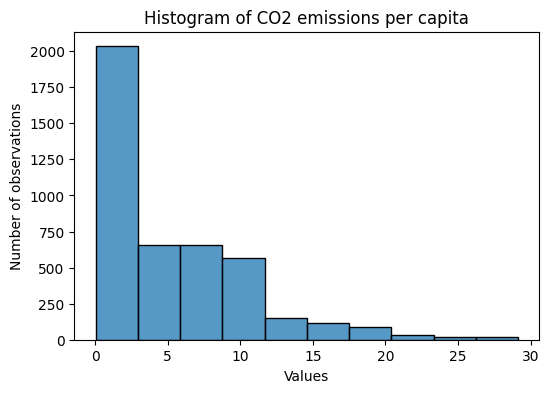

The skewness is: 1.395 


In [ ]:
histogram_skewness(df_new, 'CO2 per capita', 'Histogram of CO2 emissions per capita')

Should we do a log transformation? We think not because the skewness is only 1.351 and we decide to stick to the rule of thumb.


In [ ]:
def map_countries(df, col, title, color):
    '''This functions plots a map of the average value of column "col" for each country'''
    df_map = df.groupby('ccodealp')[col].mean().reset_index()
    fig = px.choropleth(df_map,
                        locations='ccodealp',
                        locationmode='ISO-3',
                        color=col,
                        hover_name='ccodealp',
                        color_continuous_scale=color)
    fig.update_layout(title={'text': title,
                             'y':0.95,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'})
    fig.show()

In [ ]:
#Map of co2 emissions per capita
map_countries(df_new, 'CO2 per capita', 'Average CO2 emissions per capita between 1994 and 2018', 'Reds')

It is interesting to see that the countries with the highest Environmentally related tax revenue are not the ones with the highest emissions. For instance, India.

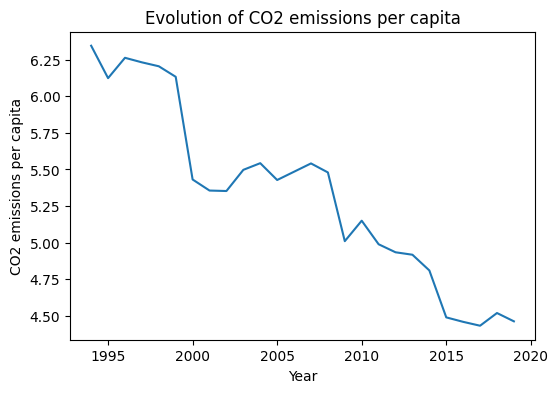

In [ ]:
df_mean_CO2_capita = df_new.groupby('year')['CO2 per capita'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.plot(df_mean_CO2_capita['year'], df_mean_CO2_capita['CO2 per capita'], linestyle='-')
plt.title('Evolution of CO2 emissions per capita')
plt.xlabel('Year')
plt.ylabel('CO2 emissions per capita')
plt.show()

This is unexpected! Is it because there are more people and hence the amount of CO2 per individual decreases?

Let's plot both variables in the same graph to better visualize the trends.

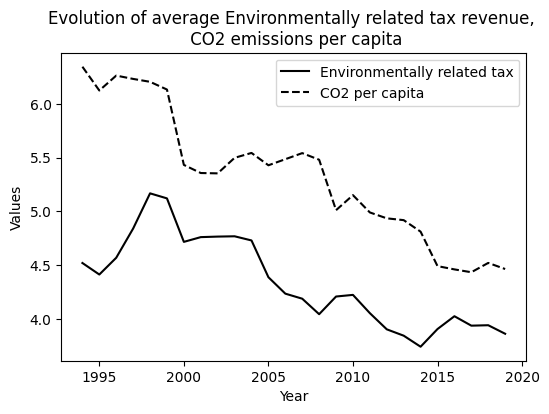

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(df_mean_Env_tax['year'], df_mean_Env_tax['Env tax'], 'k-')
plt.plot(df_mean_CO2_capita['year'], df_mean_CO2_capita['CO2 per capita'], 'k--')
plt.title('Evolution of average Environmentally related tax revenue, \n CO2 emissions per capita')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Environmentally related tax','CO2 per capita', 'number of IEAs'])
plt.show()

Let's start now the bivariate analysis

In [ ]:
#Check the correlations between our variables
variables = ['Env tax', 'CO2 per capita']
df_new_corr = df_new[variables].corr()
df_new_corr

Env tax  CO2 per capita
Env tax         1.000000       -0.012779
CO2 per capita -0.012779        1.000000

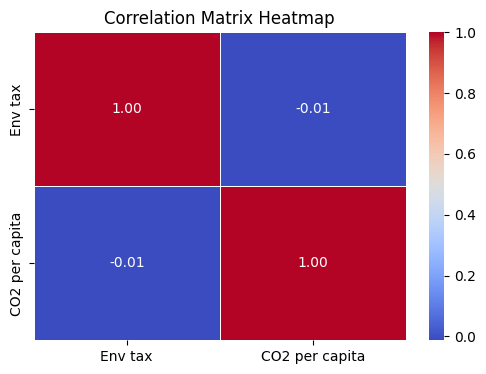

In [ ]:
#Let's plot a heat map of your correlation matrix.
plt.figure(figsize=(6, 4))
sns.heatmap(df_new_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Text(0, 0.5, 'CO2 emissions per capita')

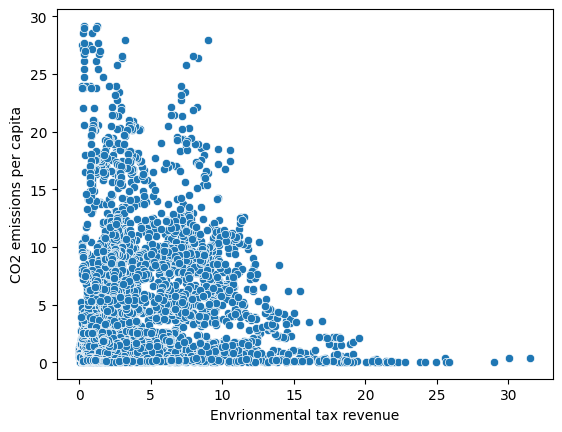

In [ ]:
sns.scatterplot(x='Env tax', y='CO2 per capita', data=df_new)
plt.xlabel('Envrionmental tax revenue')
plt.ylabel('CO2 emissions per capita')

Text(0, 0.5, 'CO2 emissions per capita')

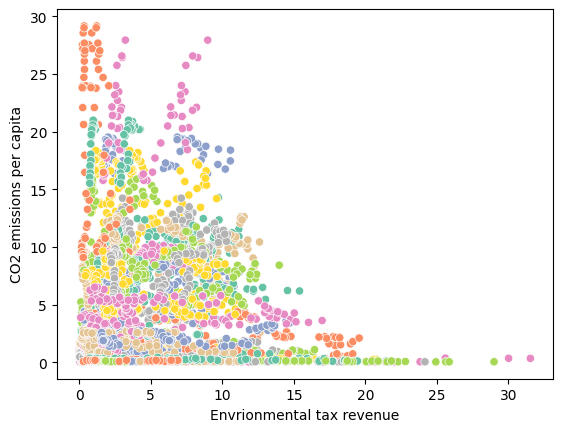

In [ ]:
#Scatter plot coloring the dots by countries
sns.scatterplot(x='Env tax', y='CO2 per capita', legend=False, hue='country', palette='Set2', data=df_new)
plt.xlabel('Envrionmental tax revenue')
plt.ylabel('CO2 emissions per capita')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



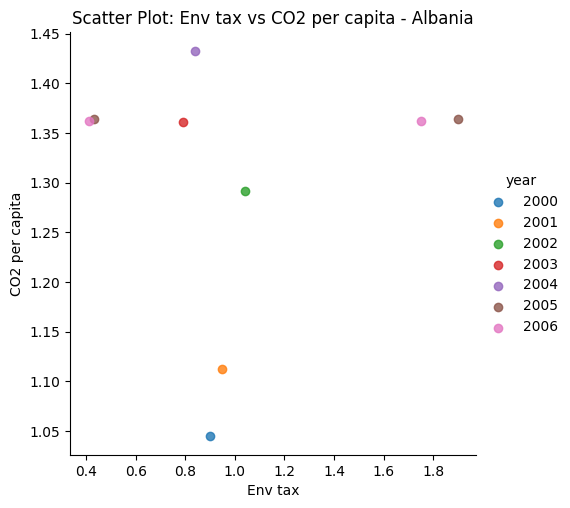

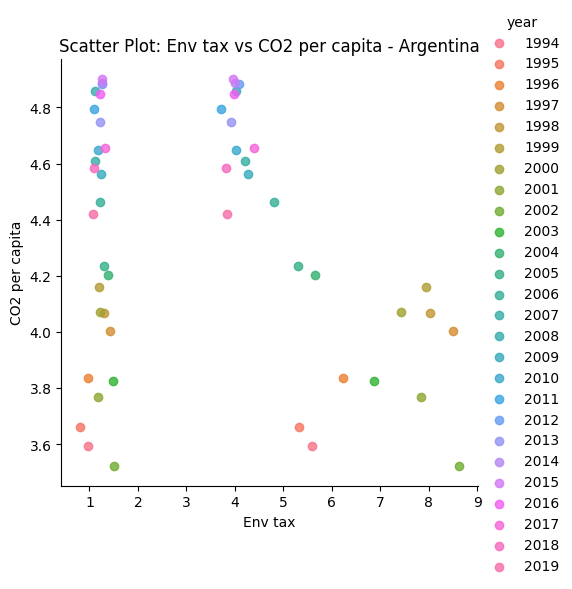

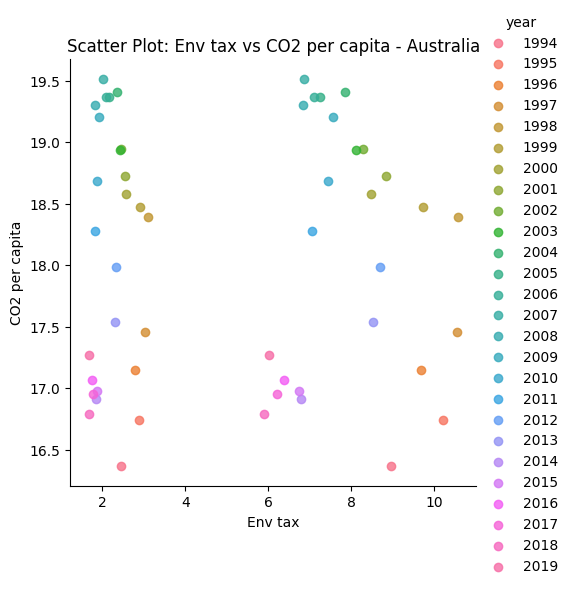

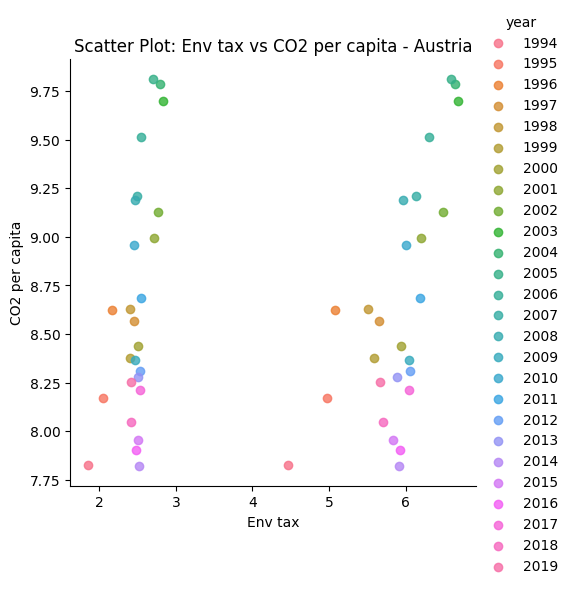

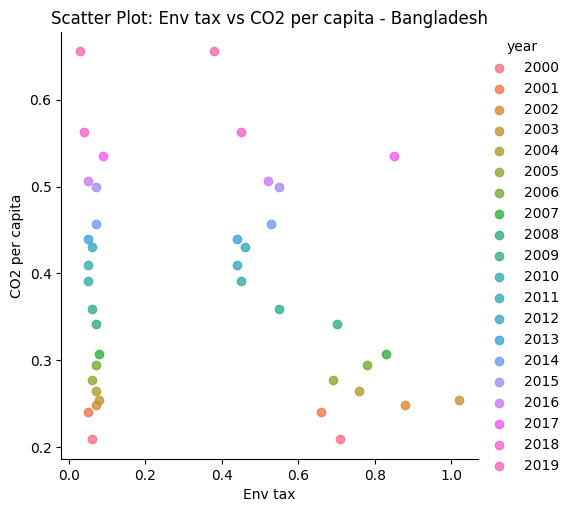

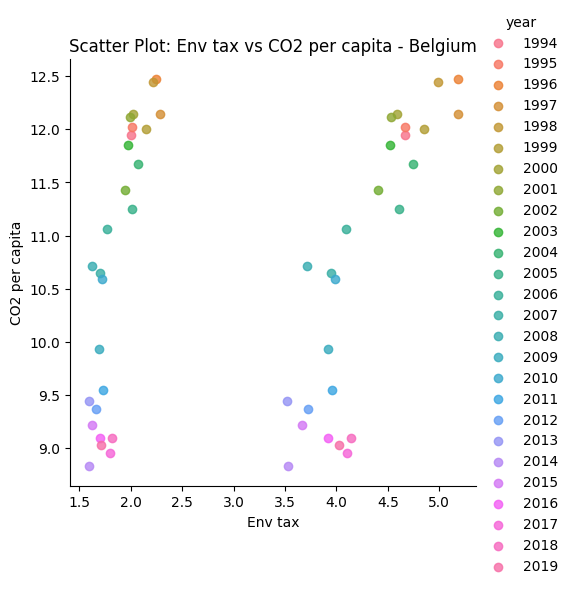

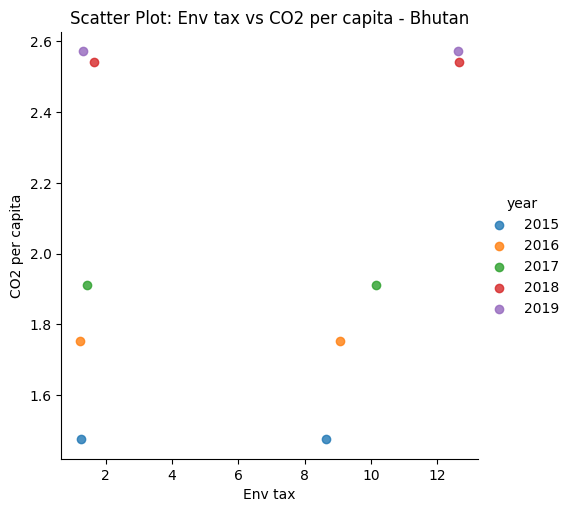

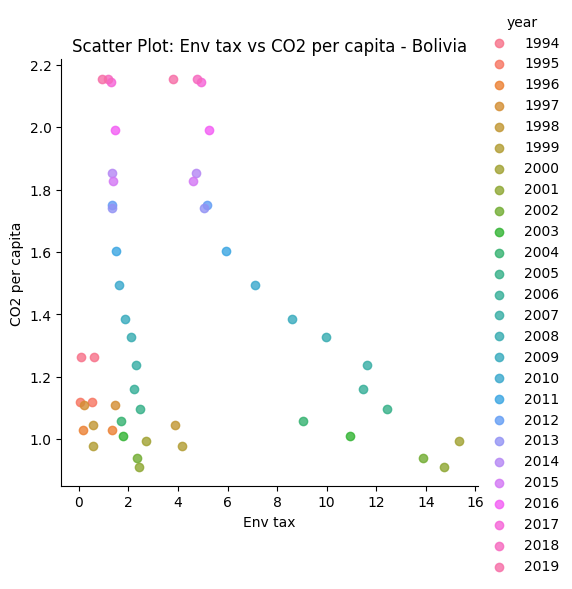

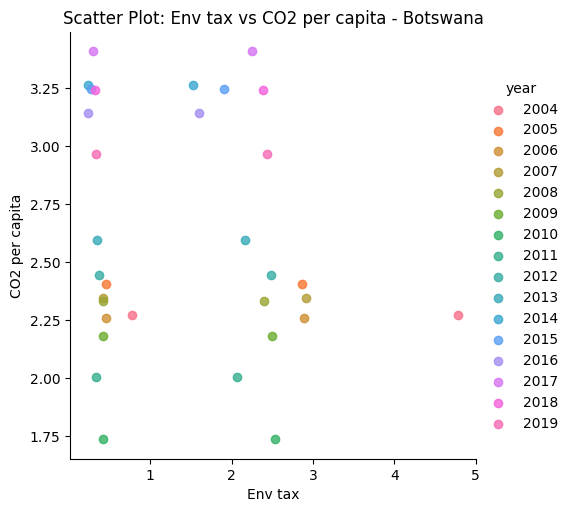

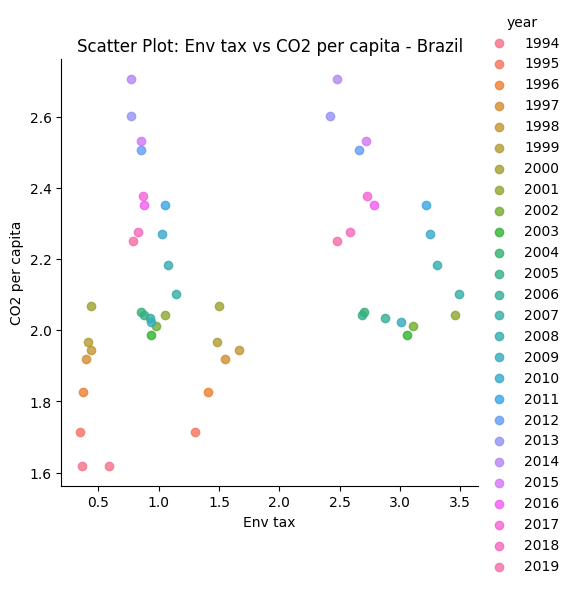

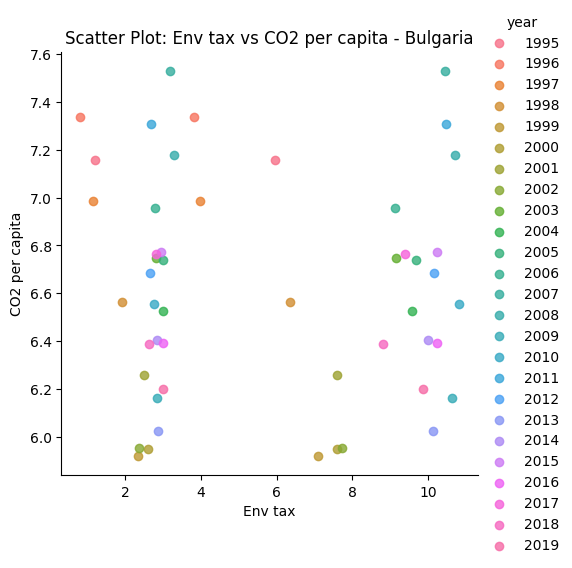

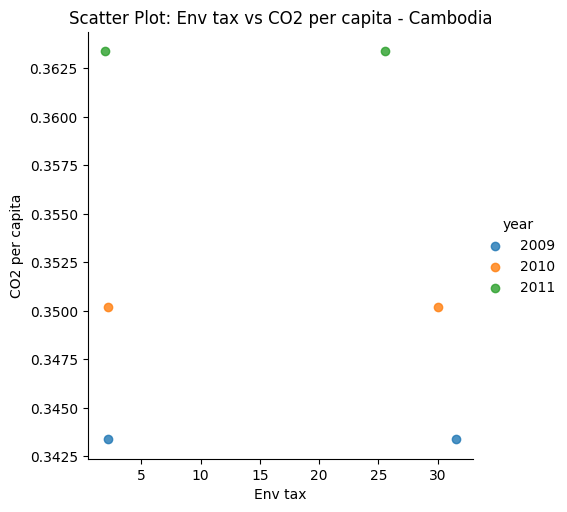

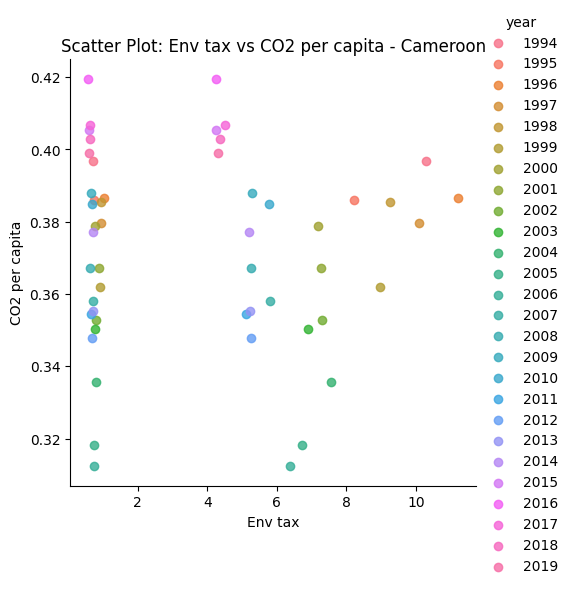

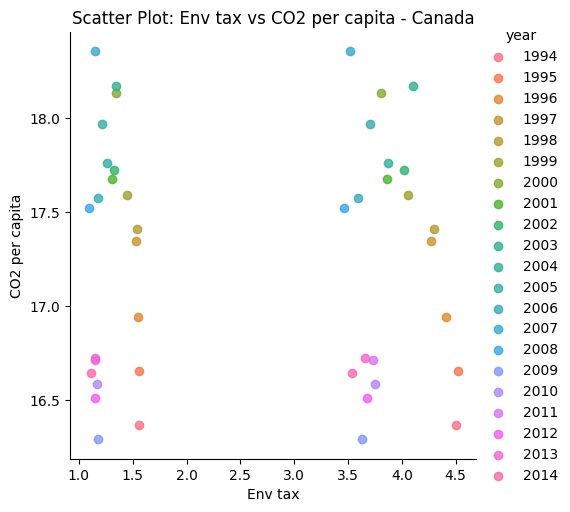

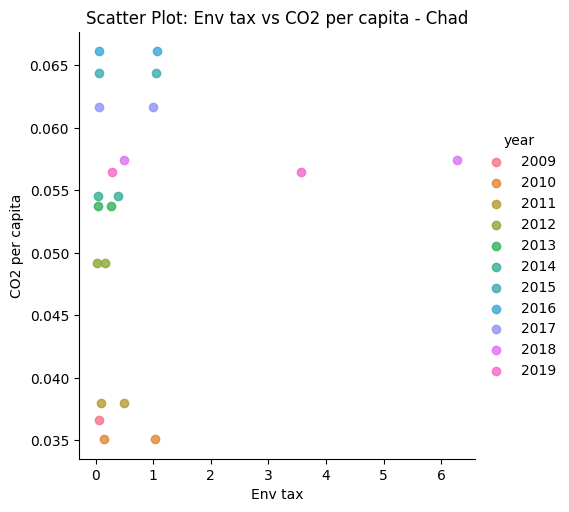

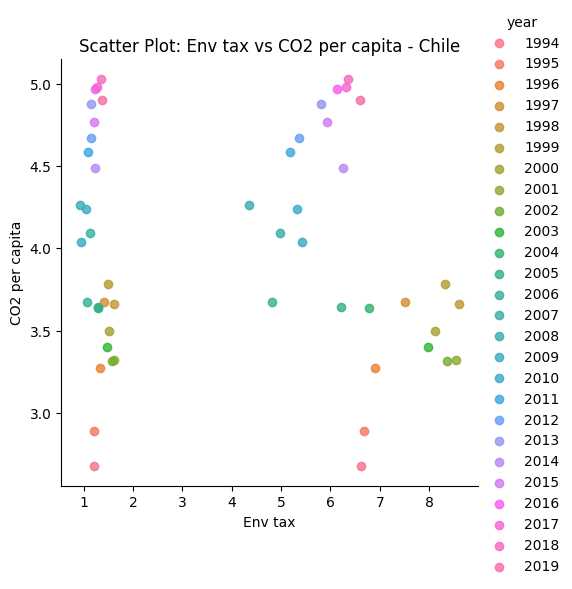

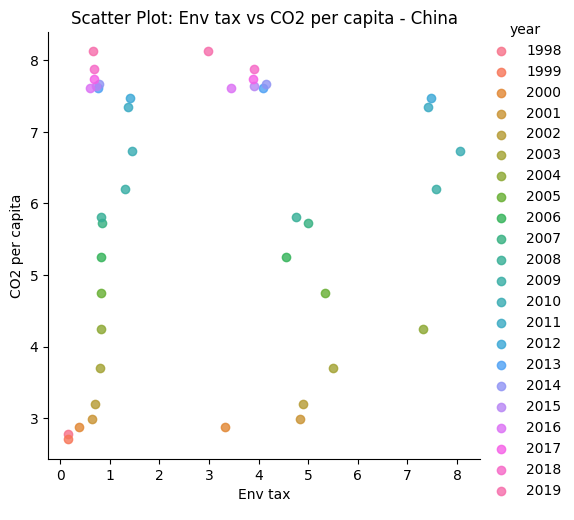

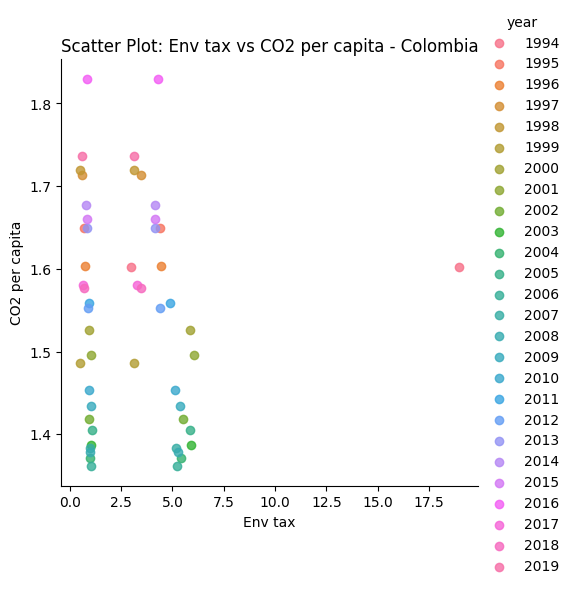

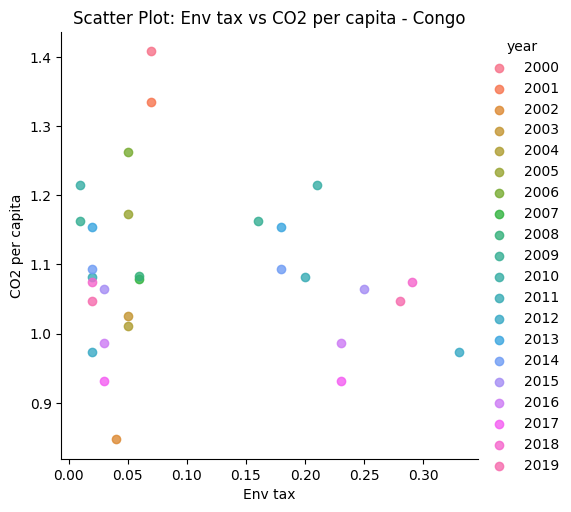

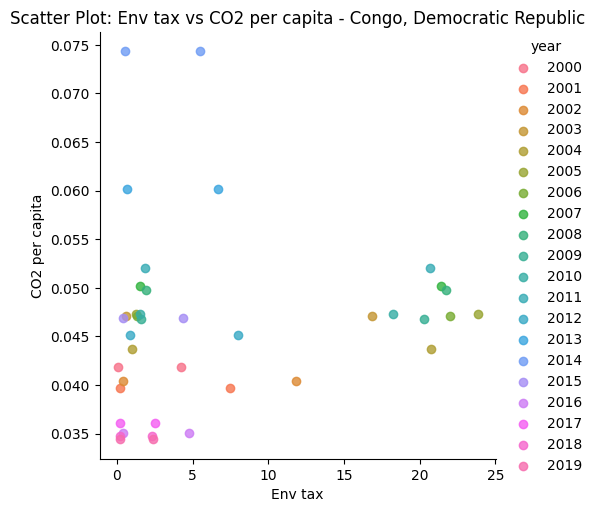

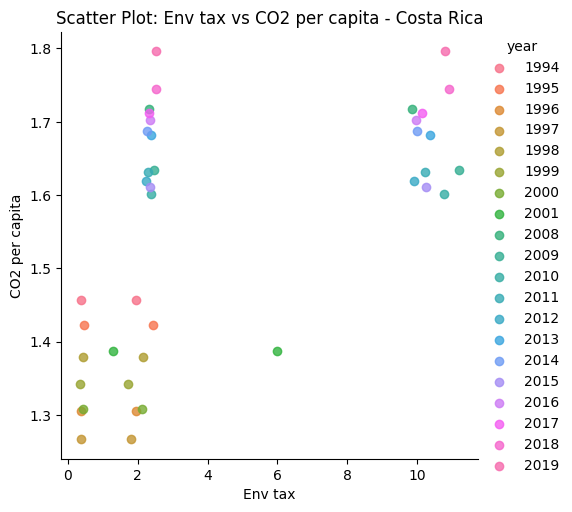

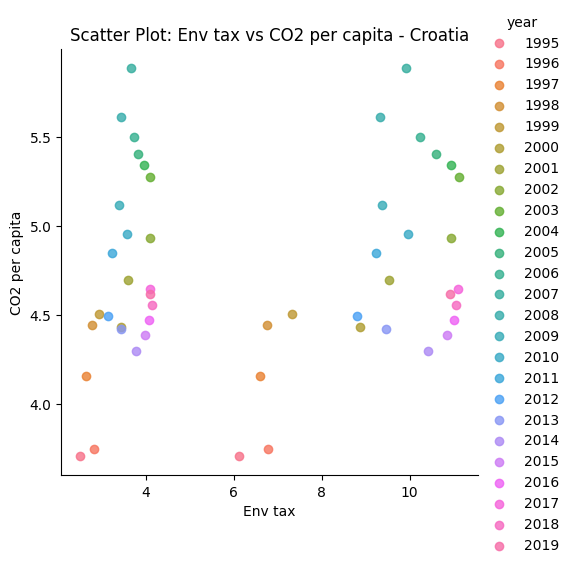

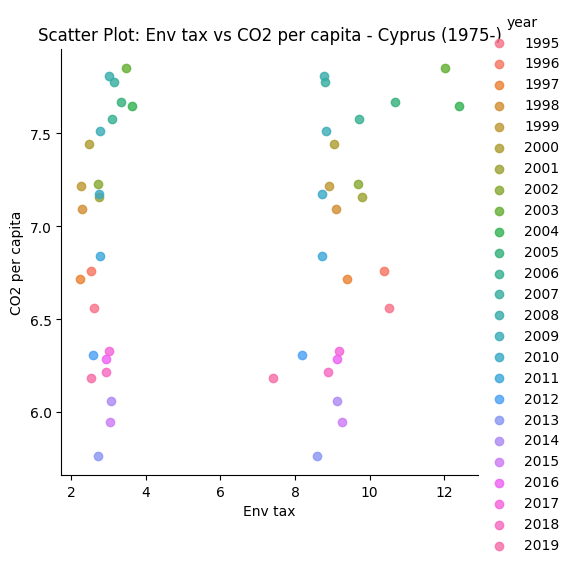

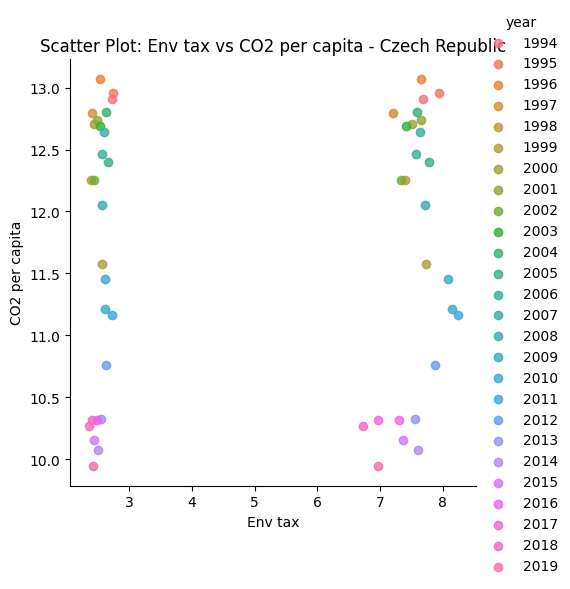

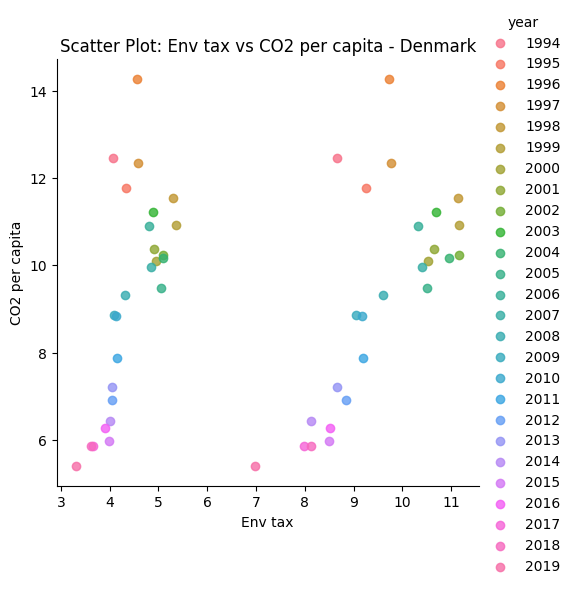

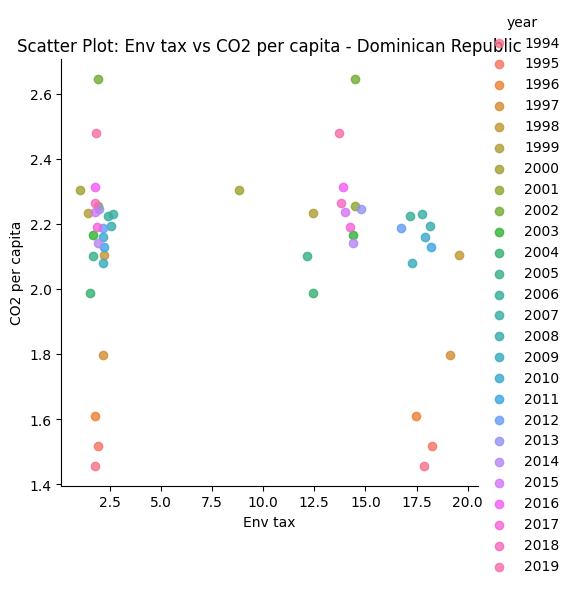

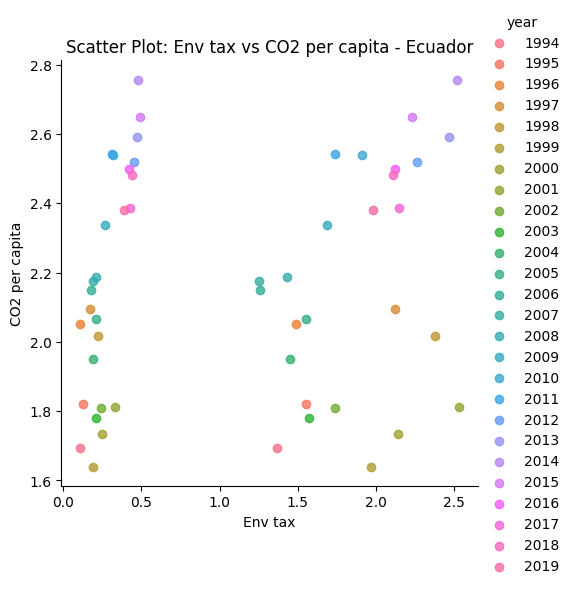

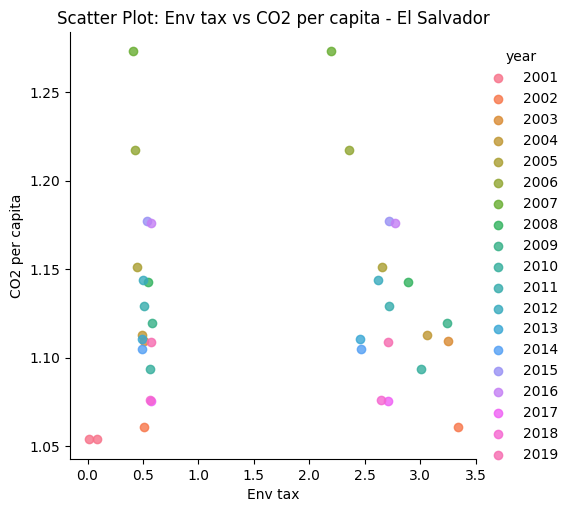

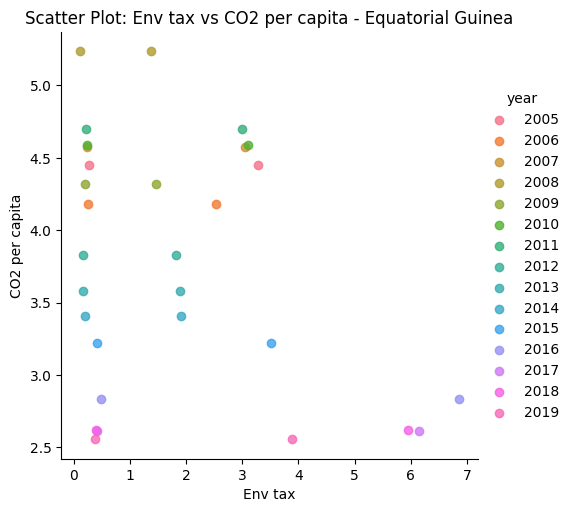

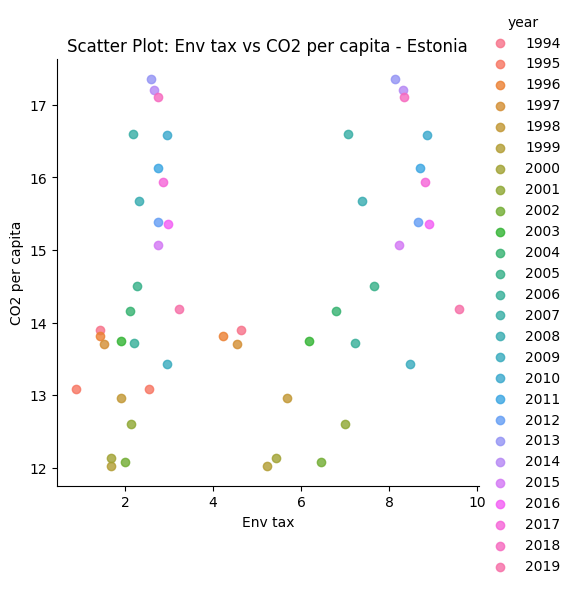

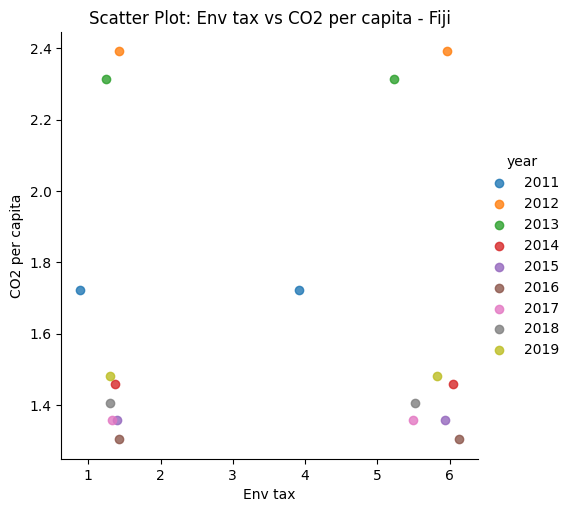

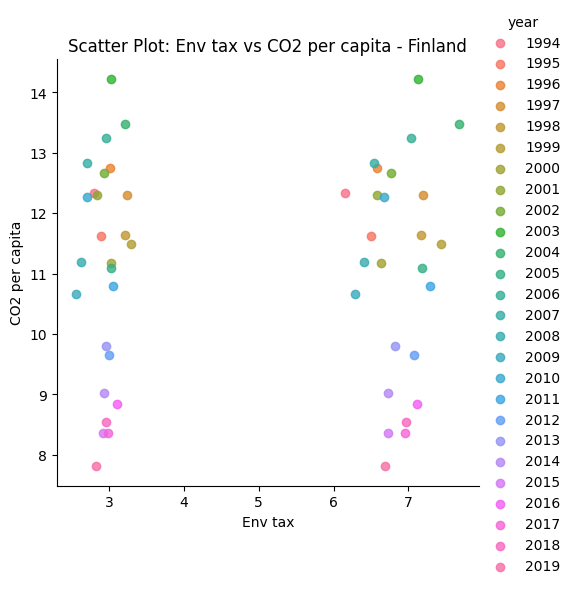

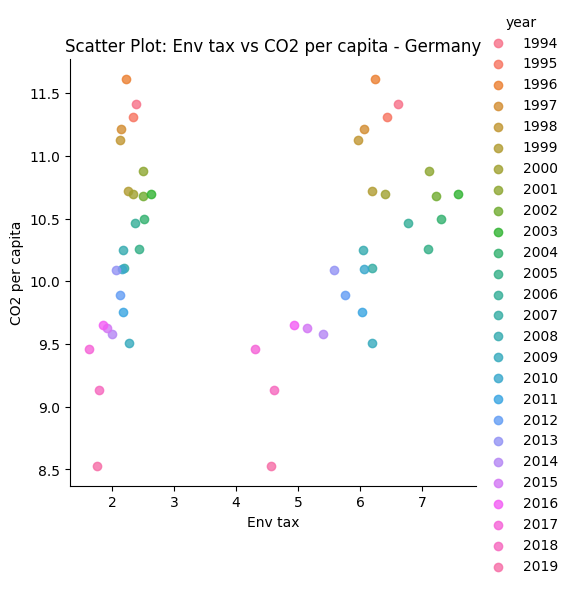

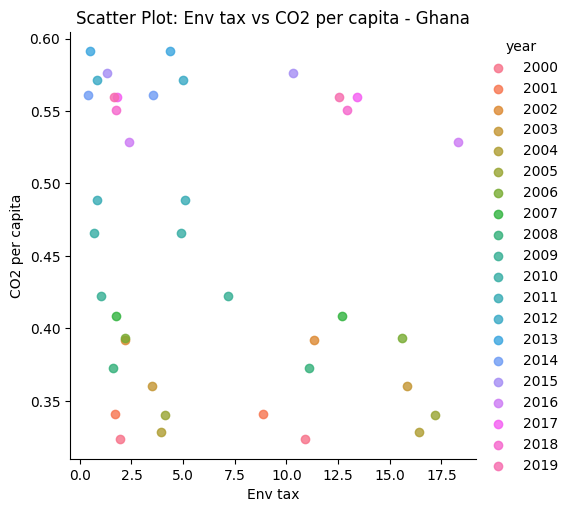

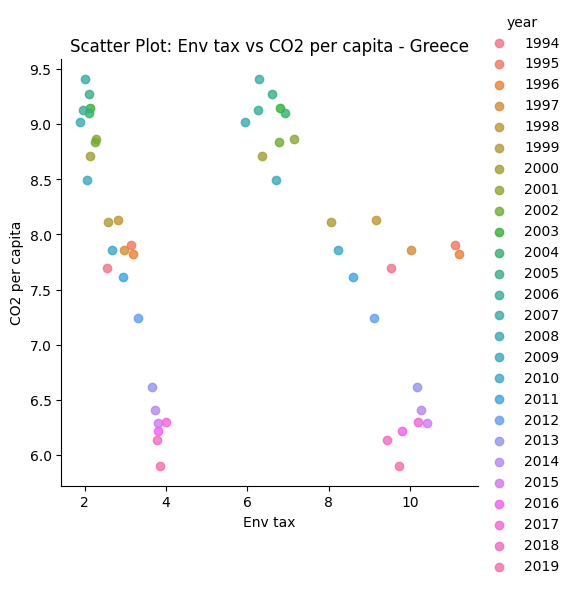

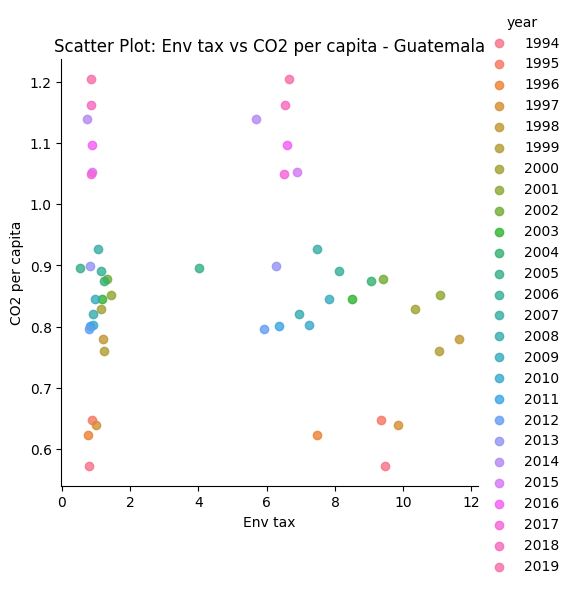

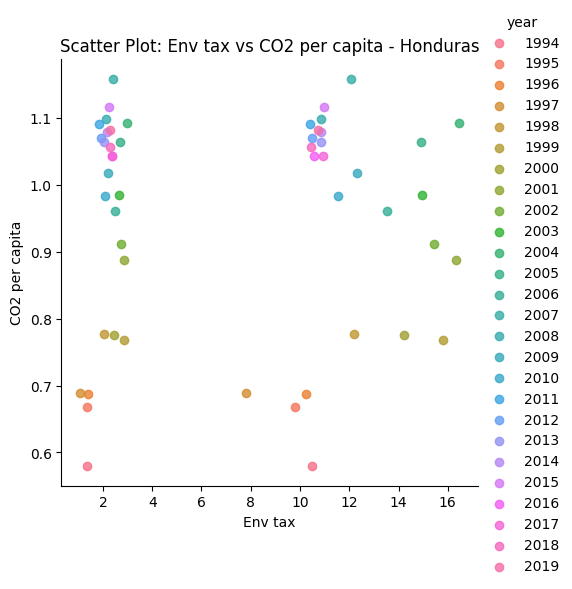

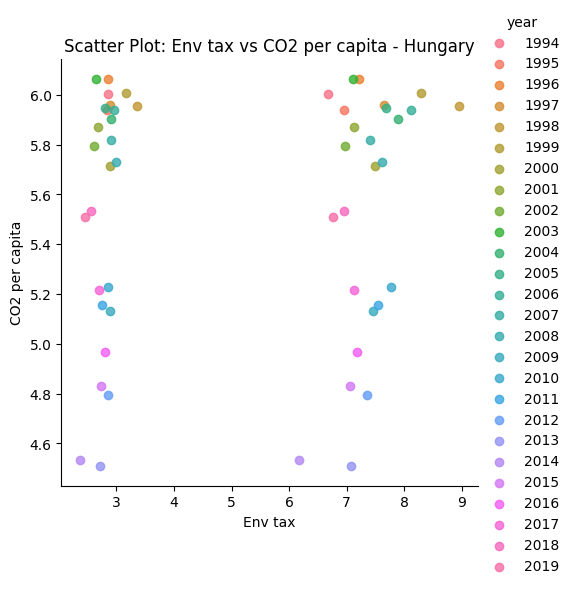

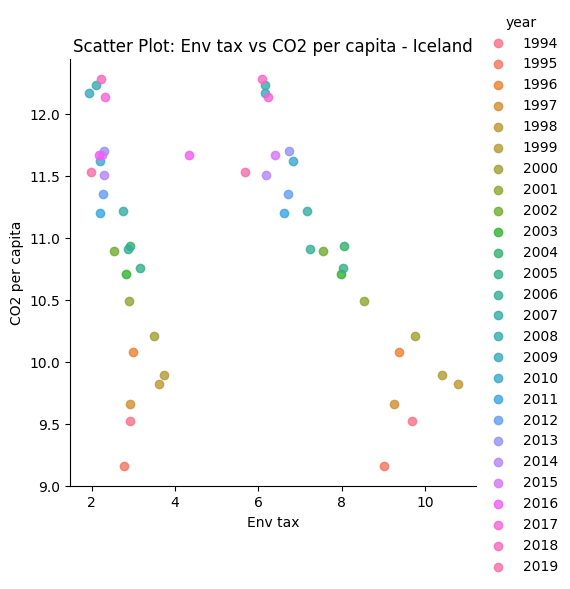

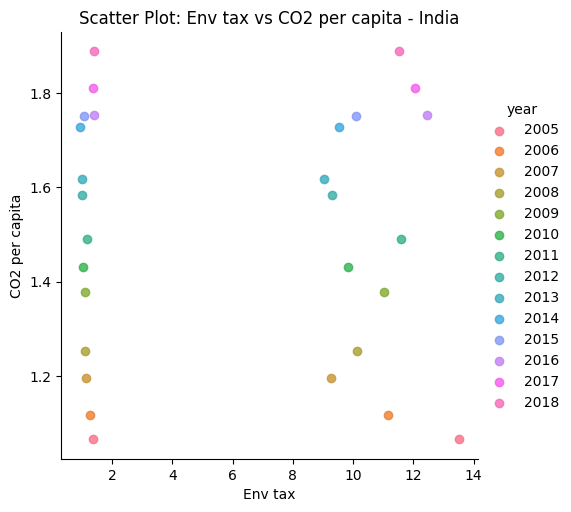

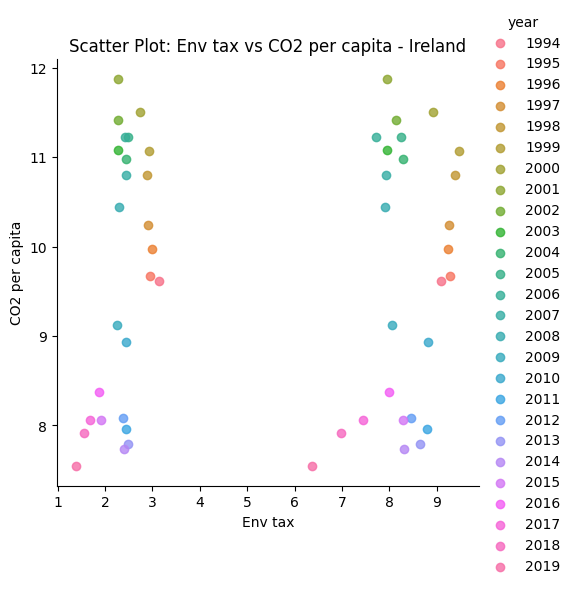

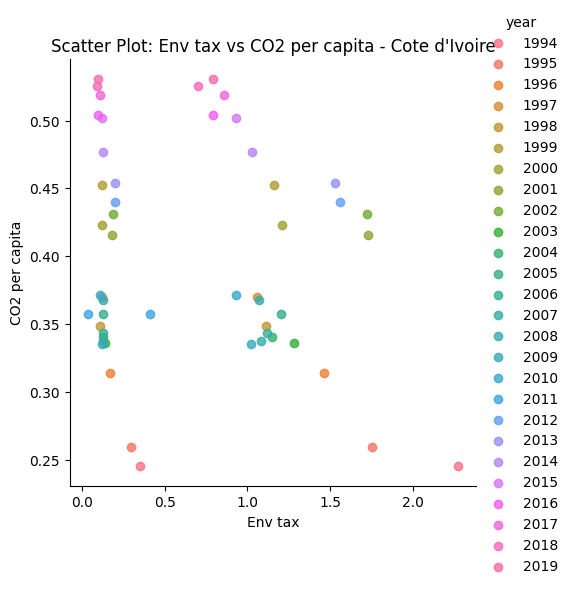

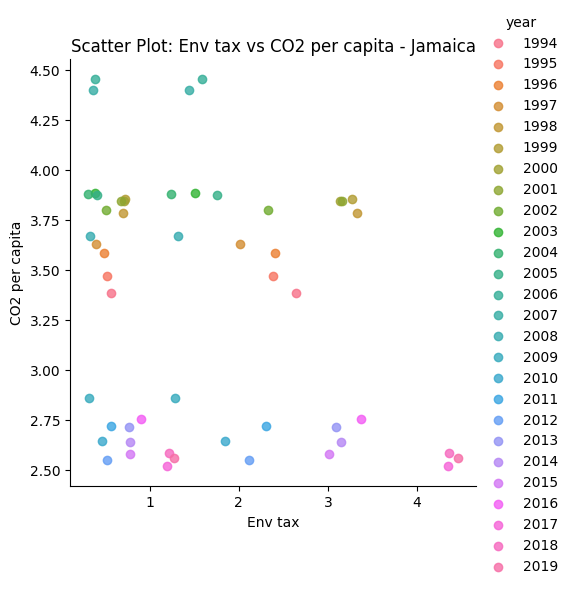

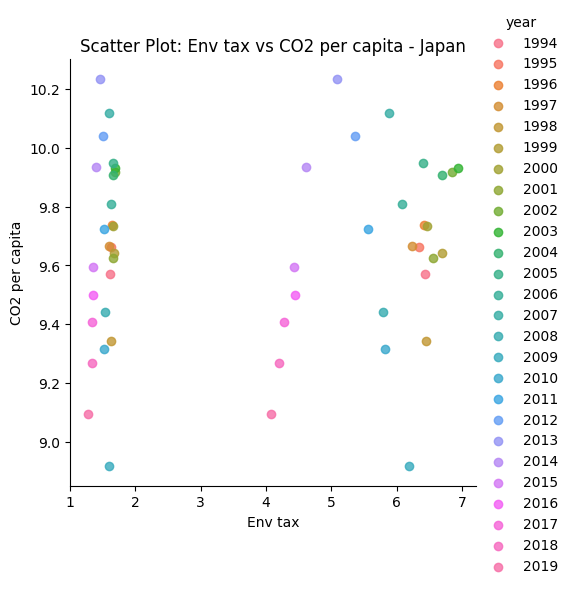

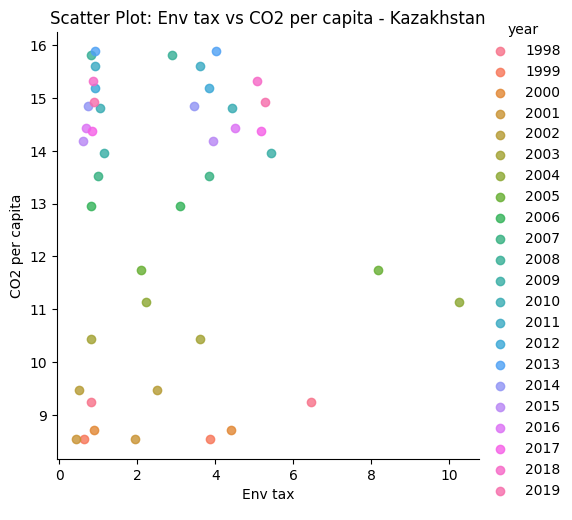

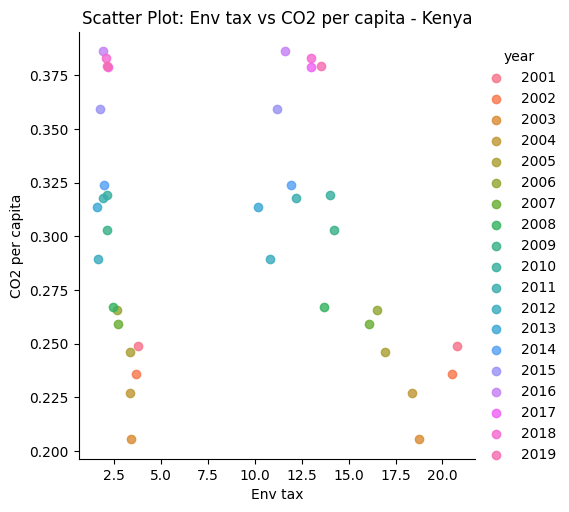

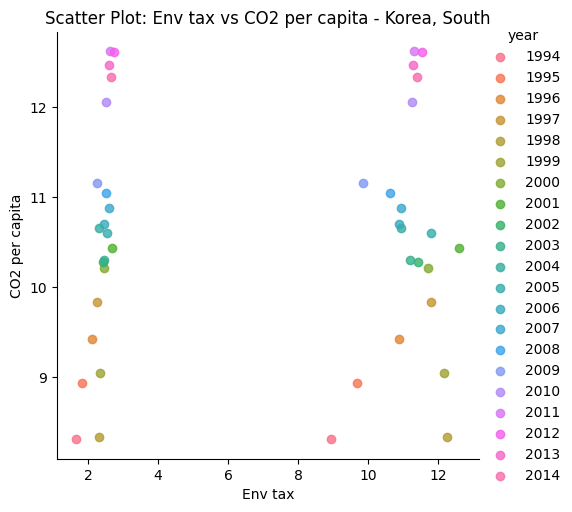

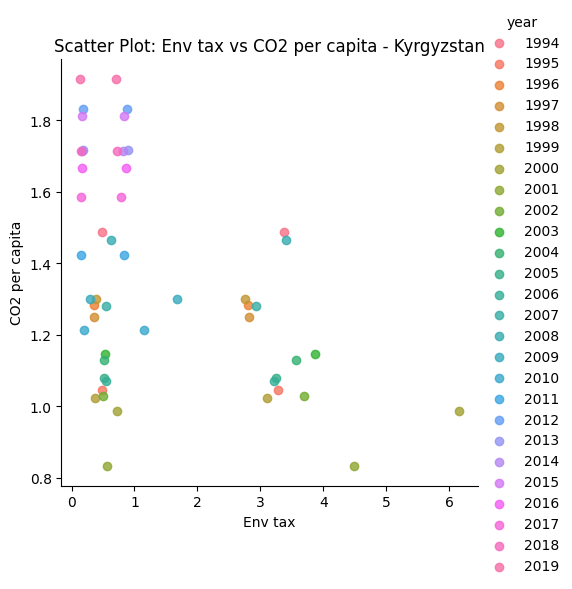

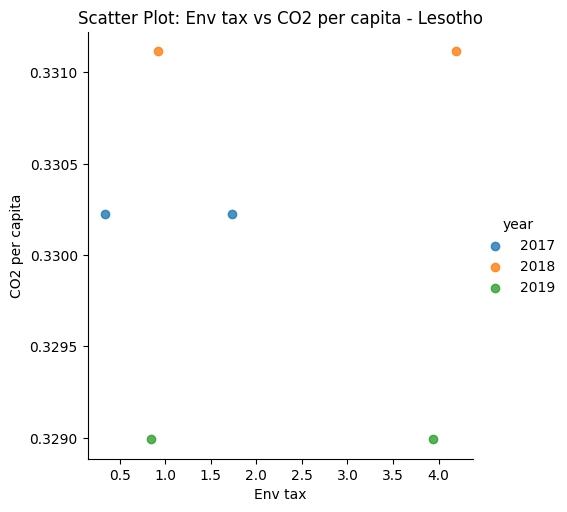

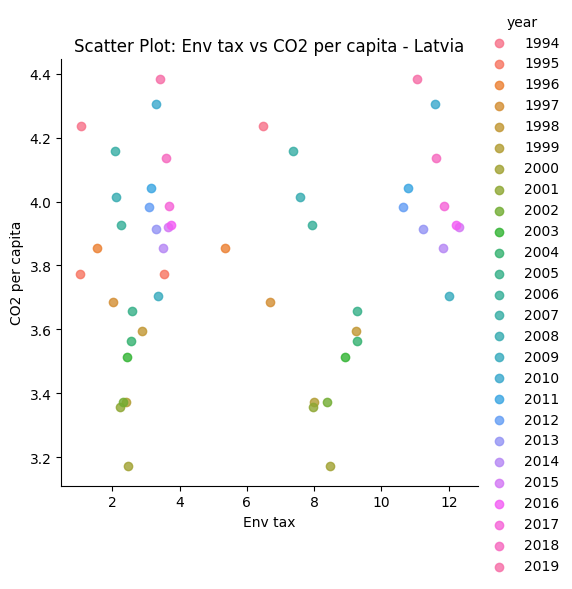

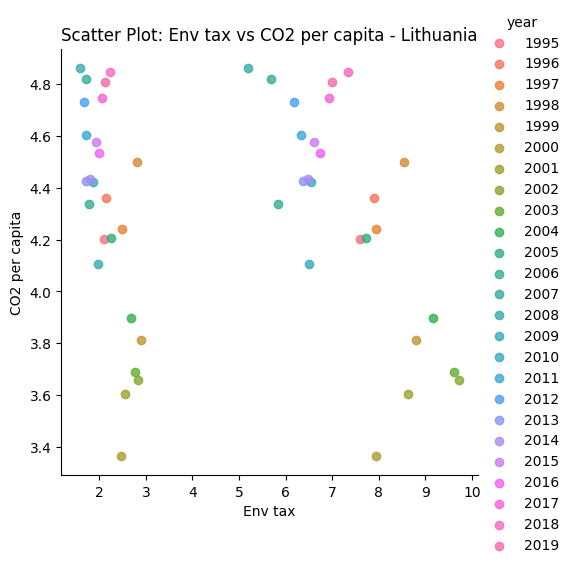

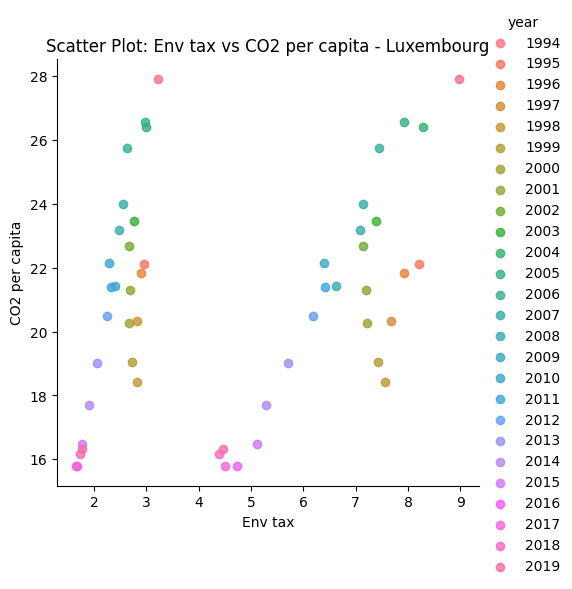

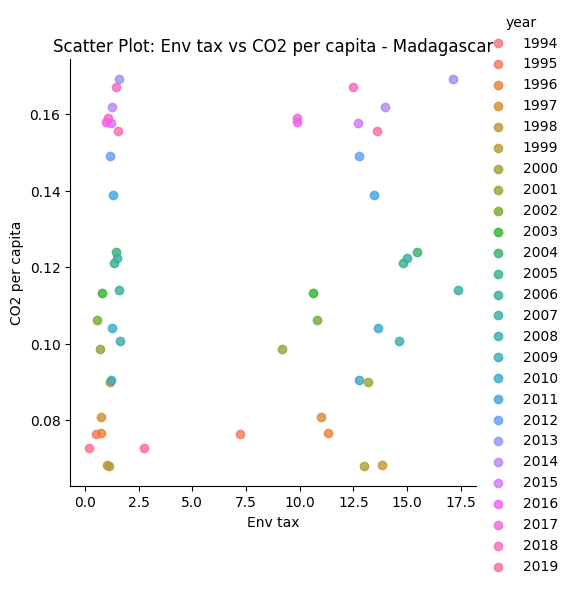

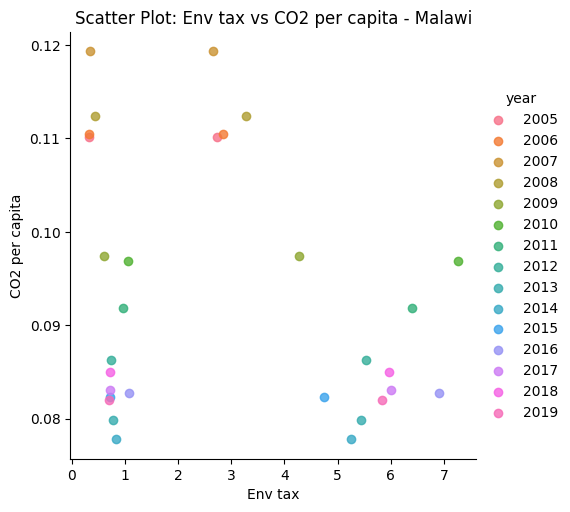

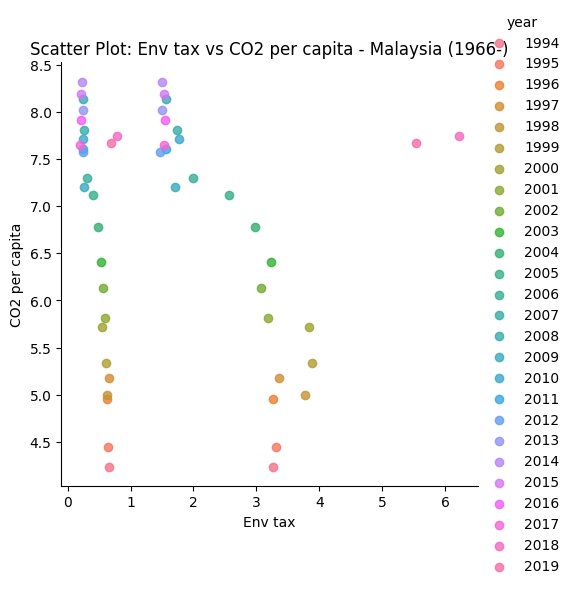

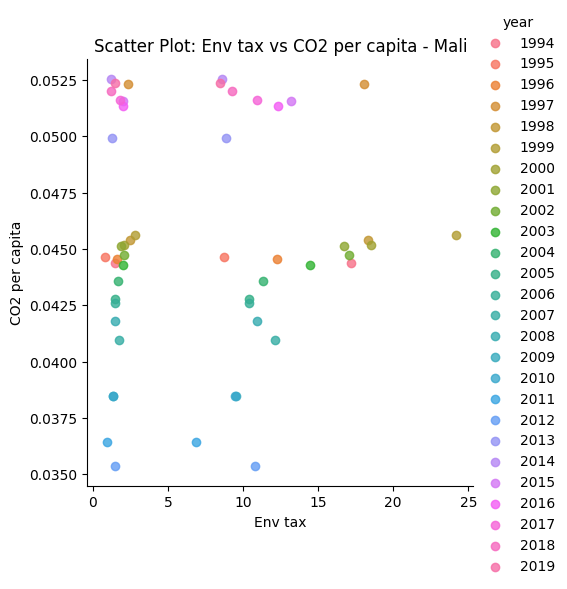

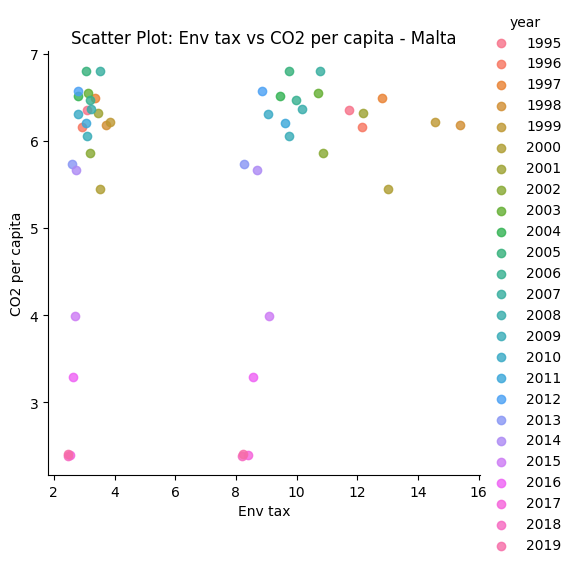

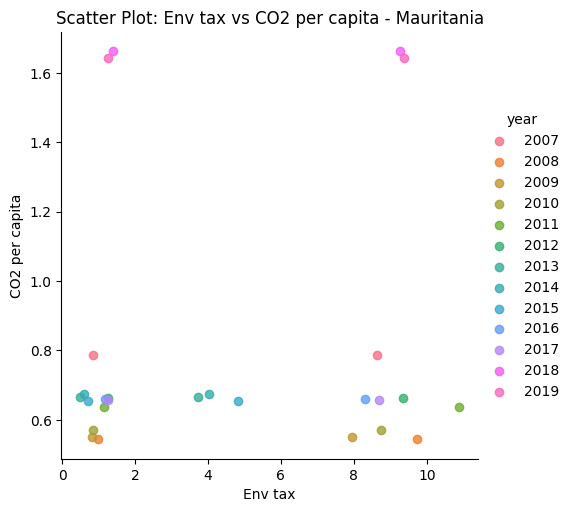

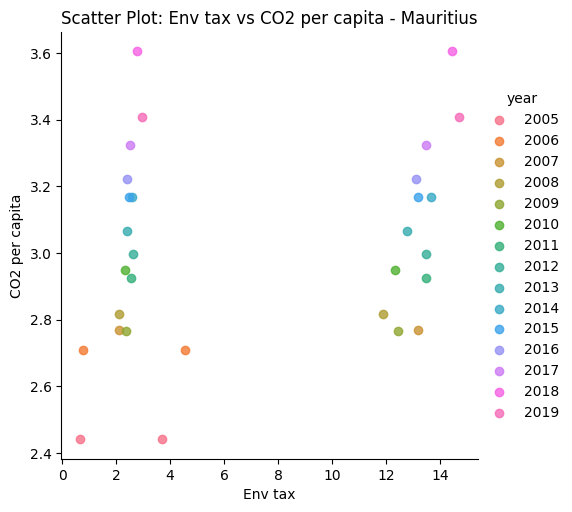

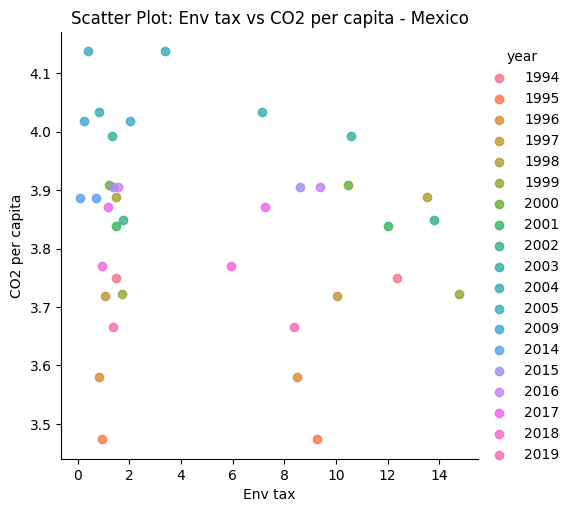

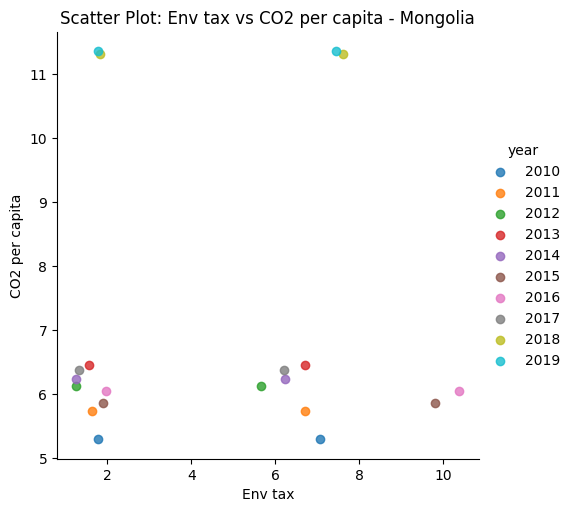

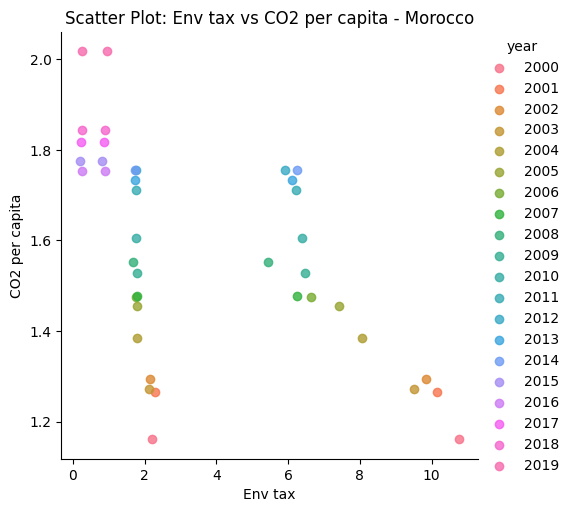

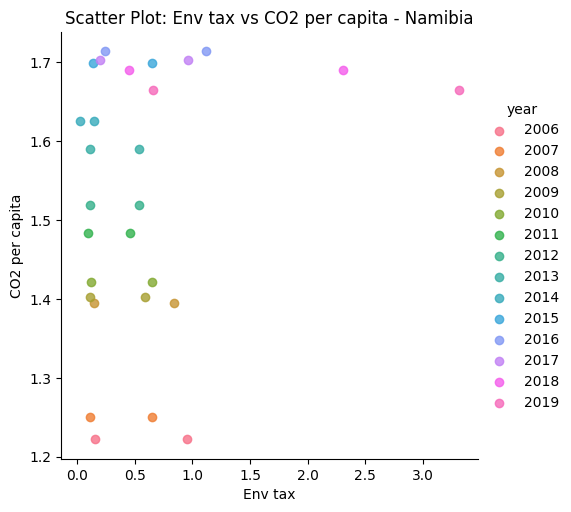

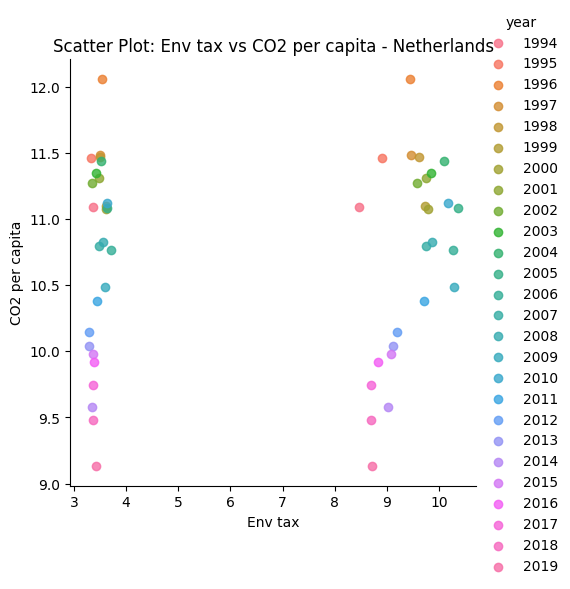

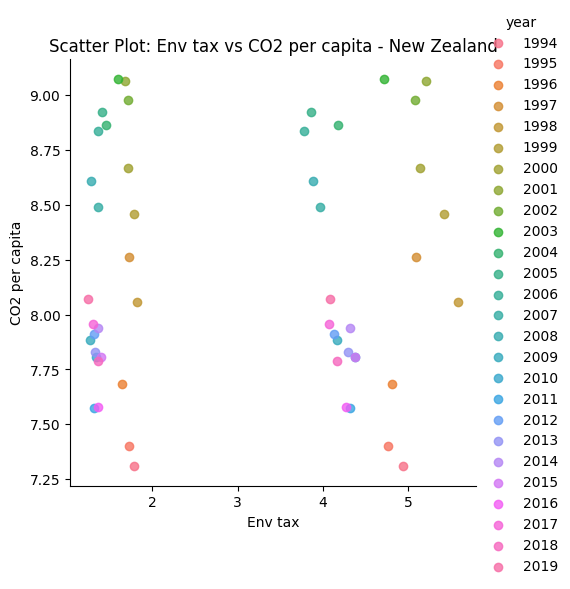

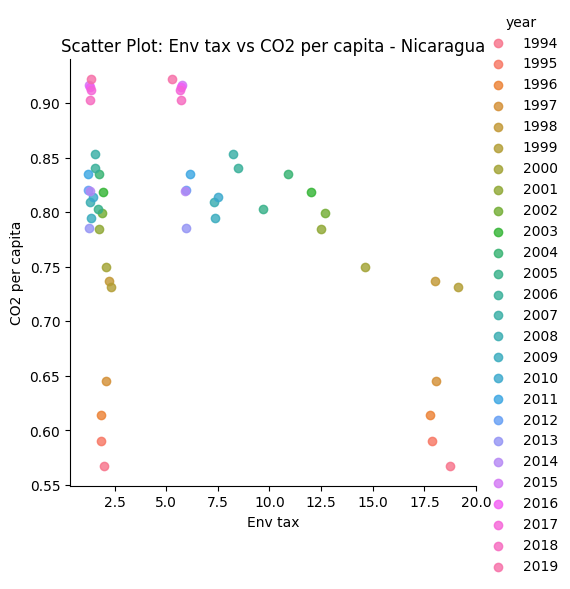

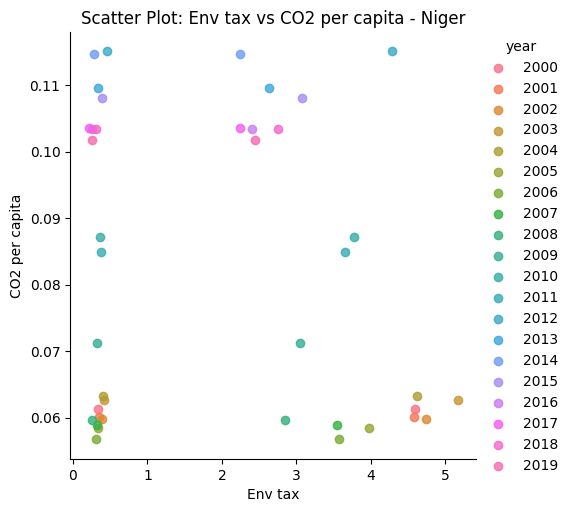

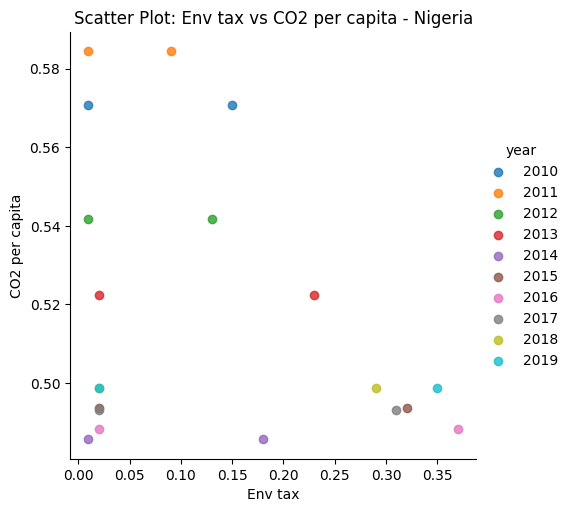

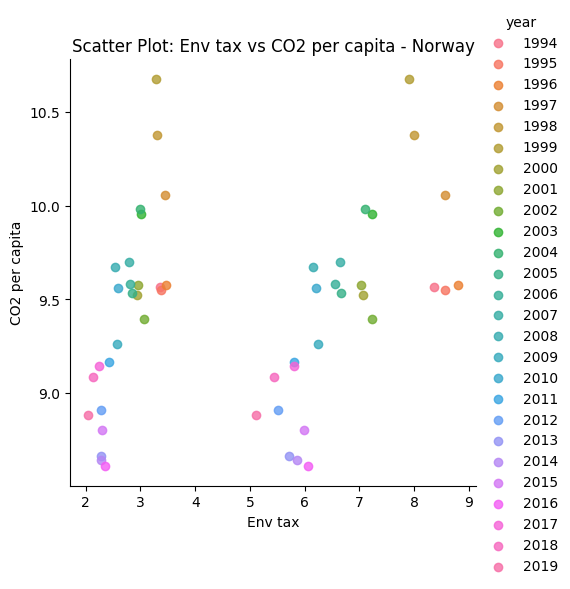

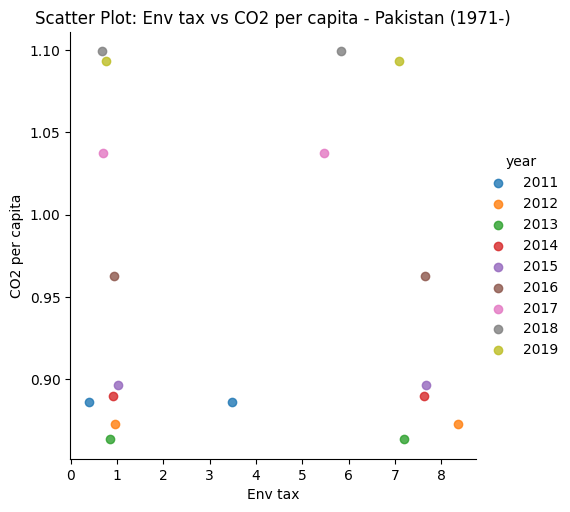

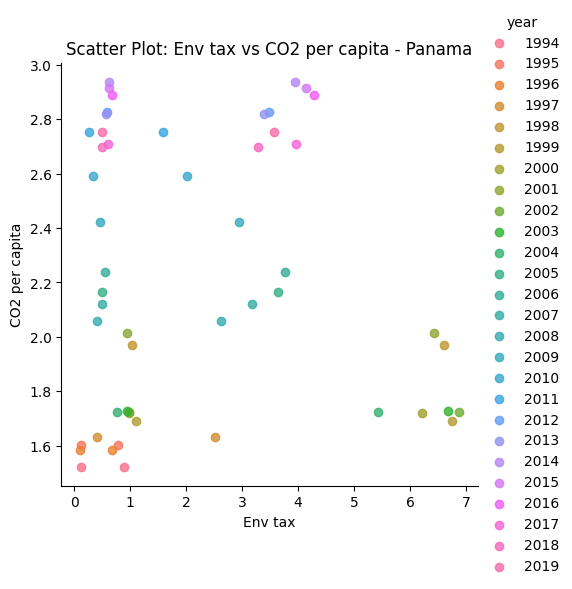

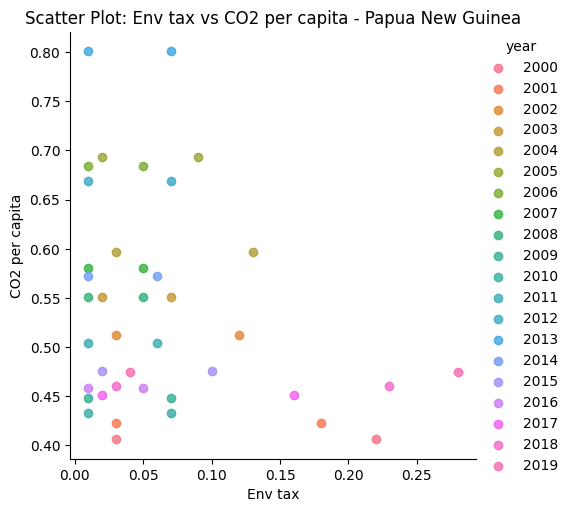

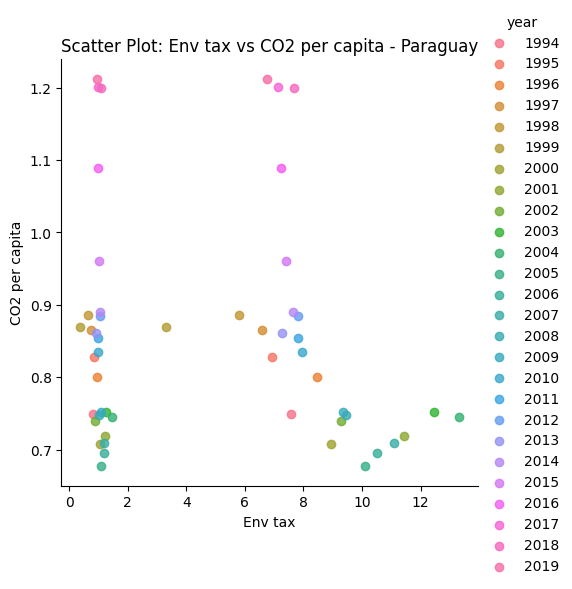

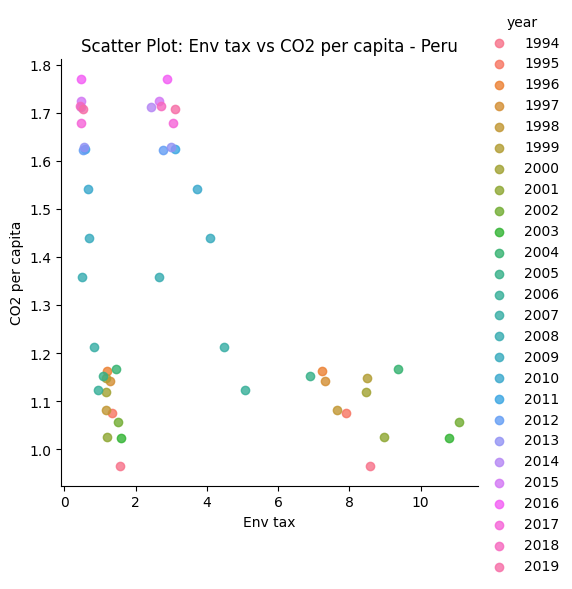

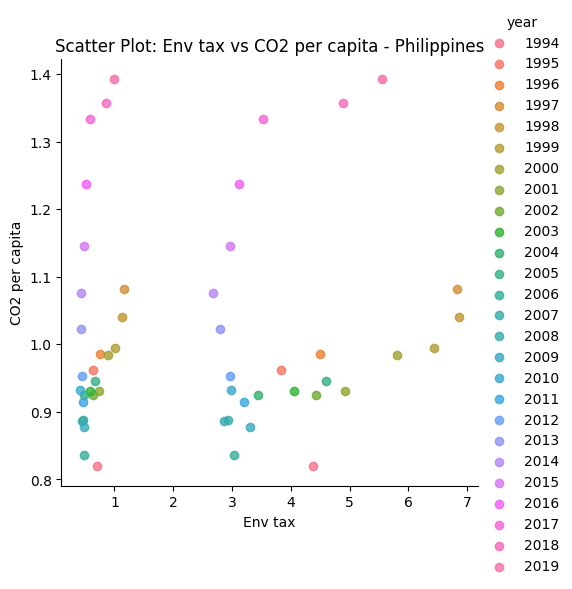

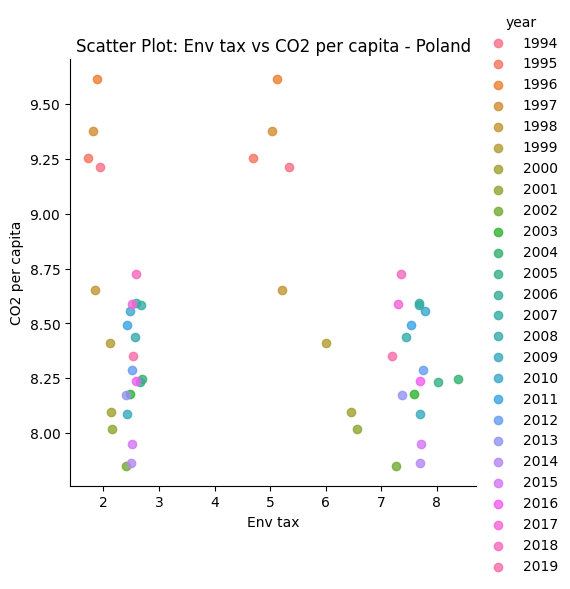

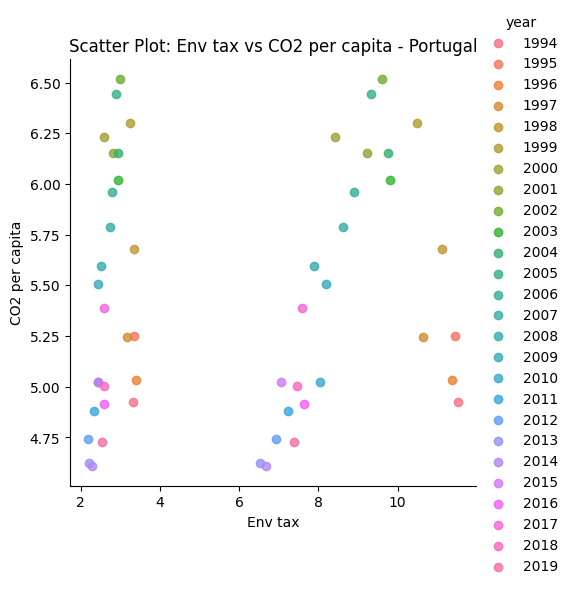

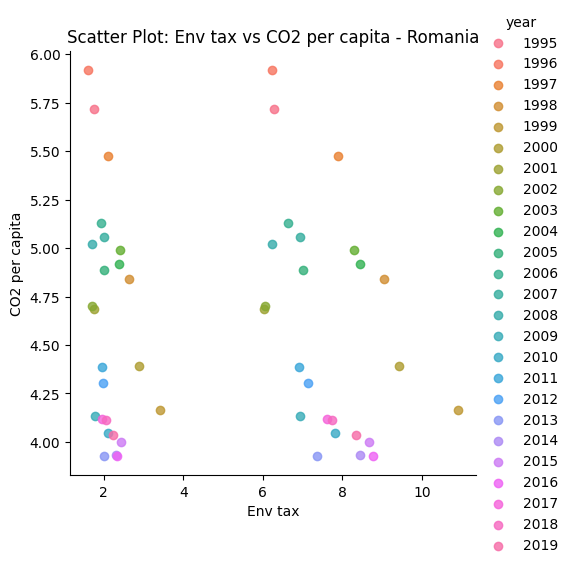

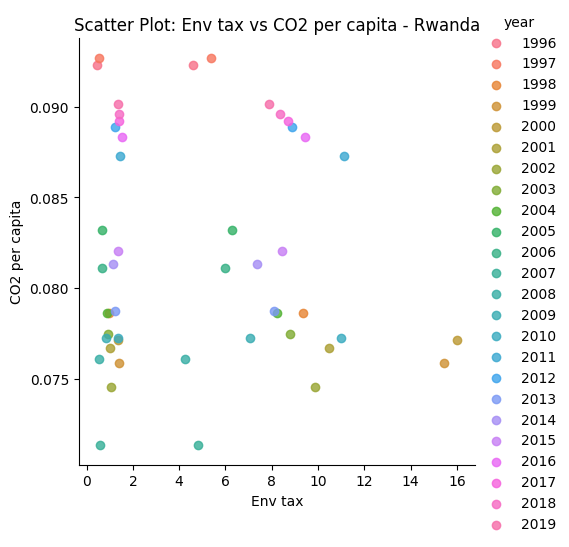

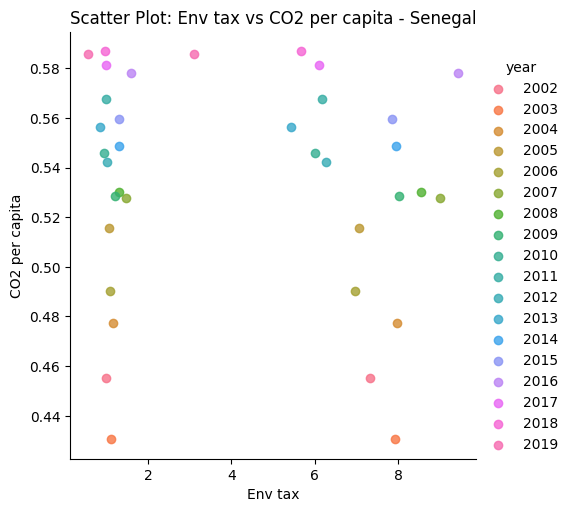

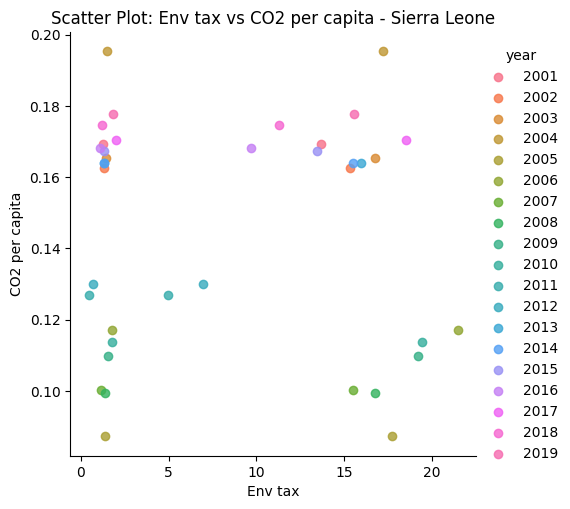

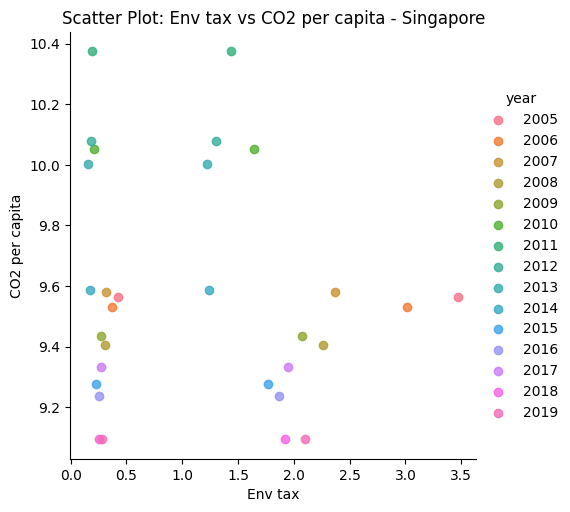

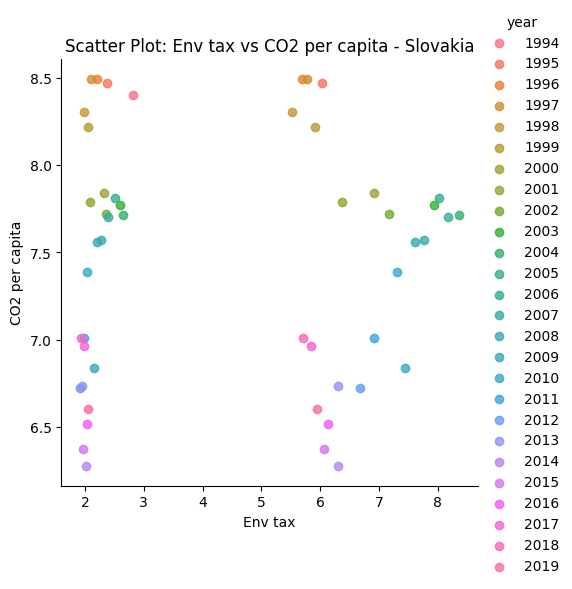

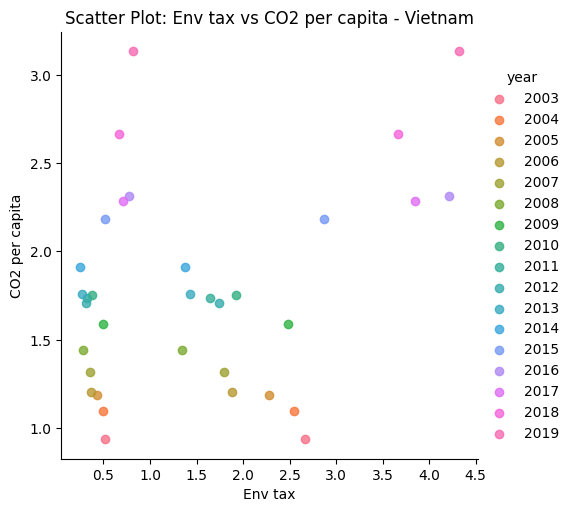

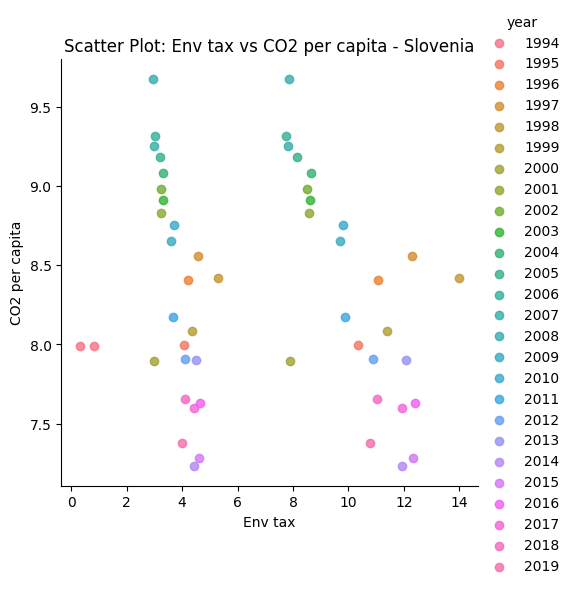

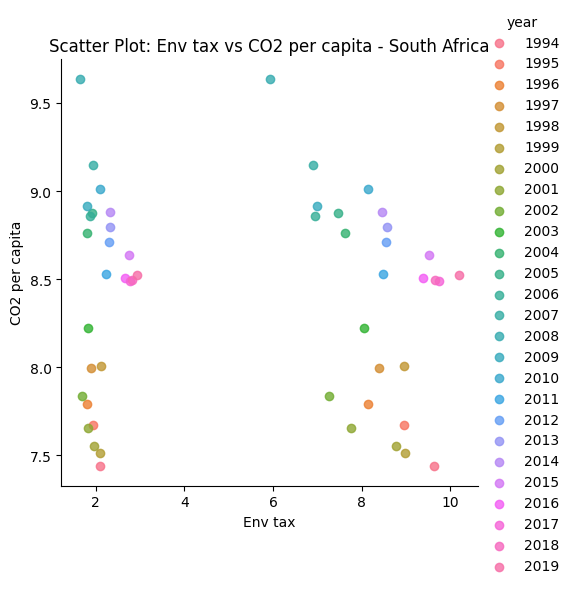

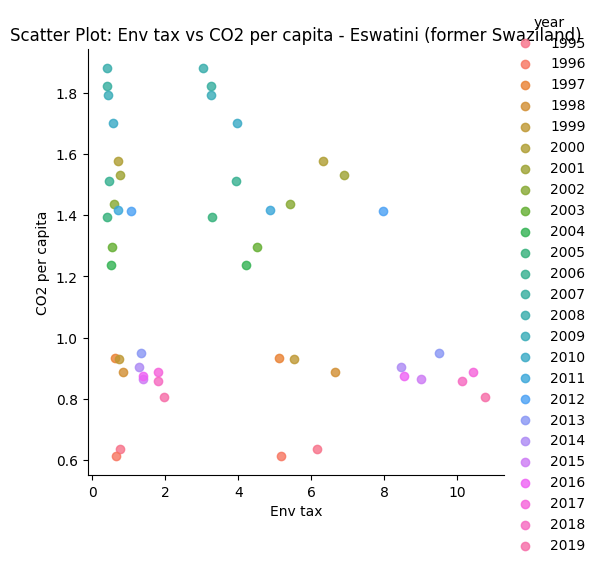

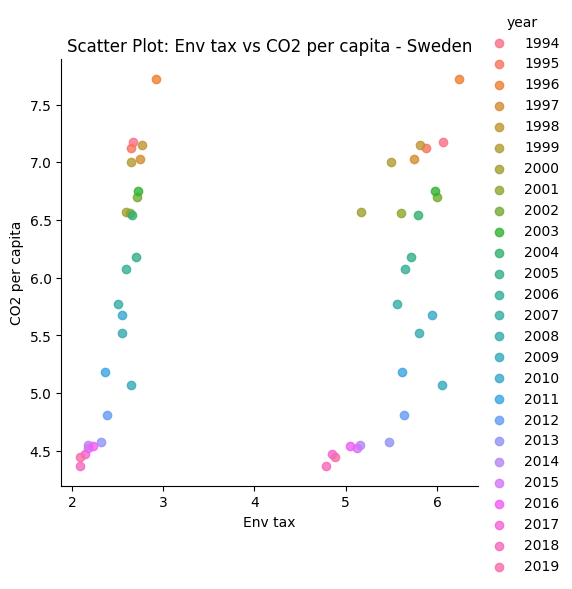

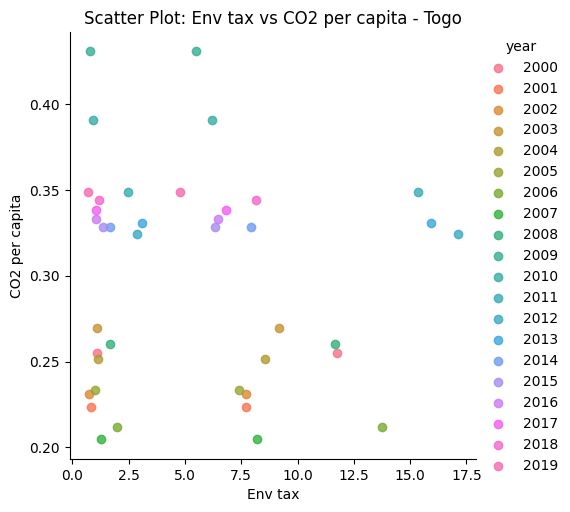

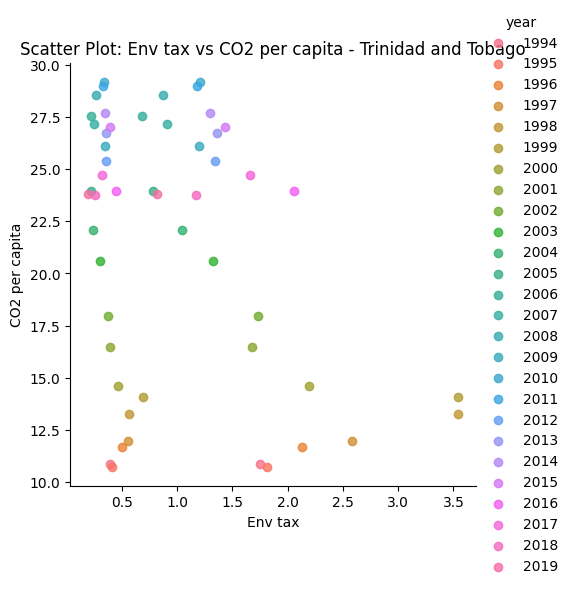

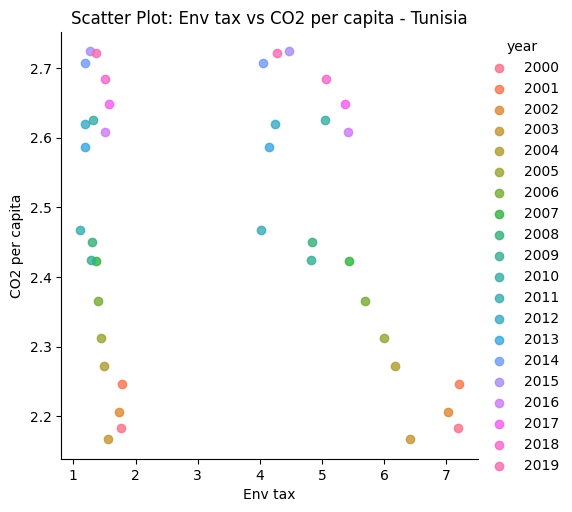

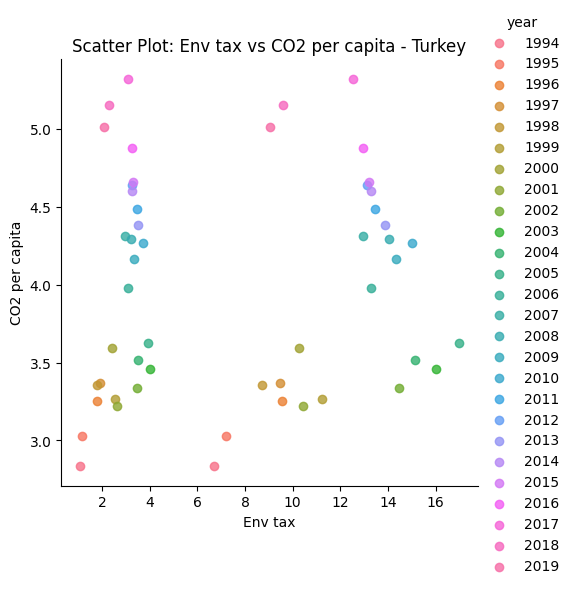

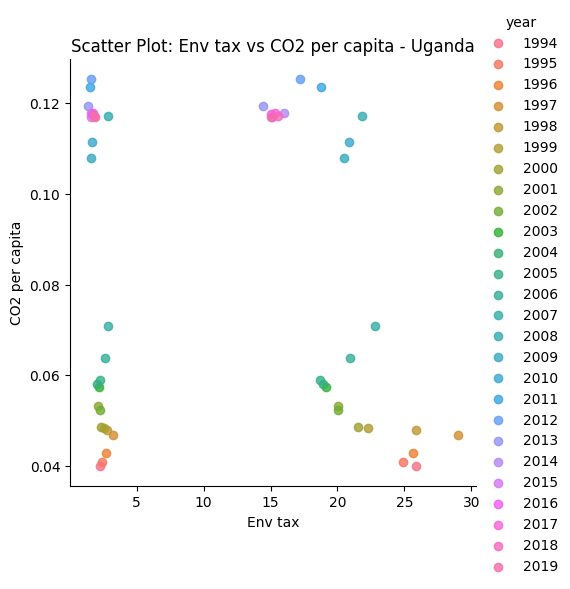

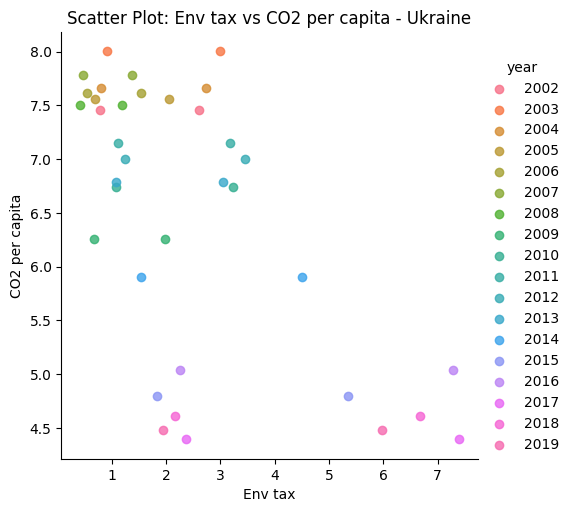

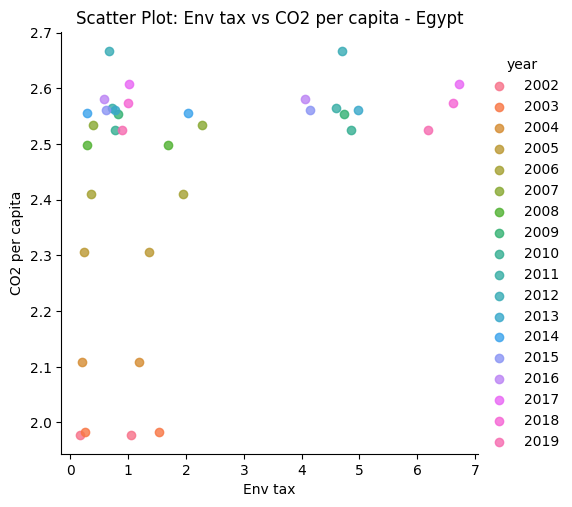

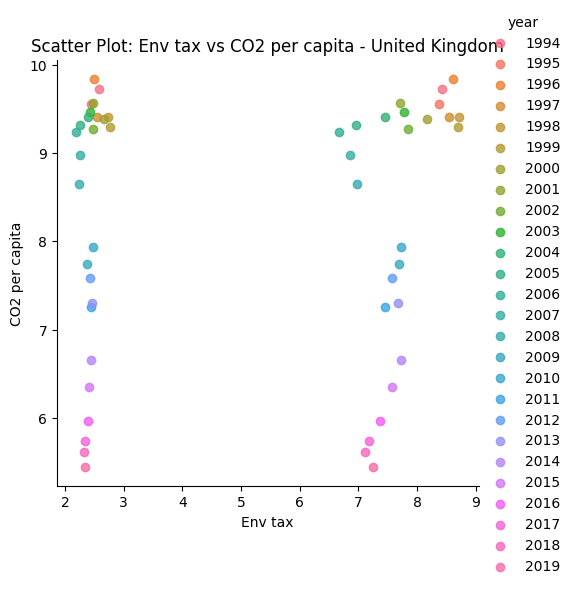

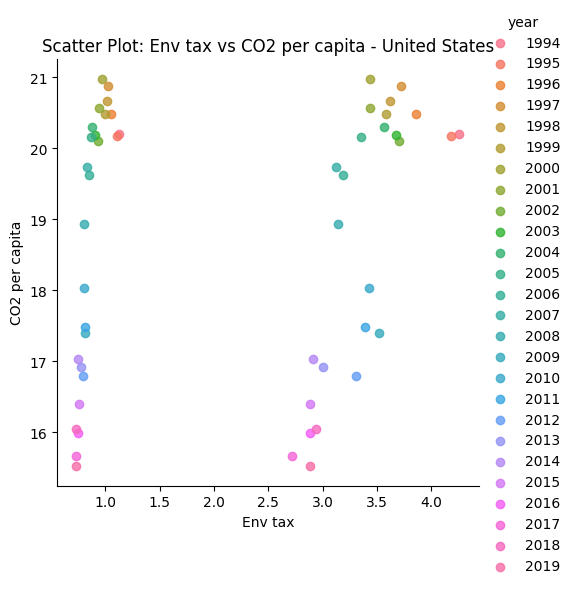

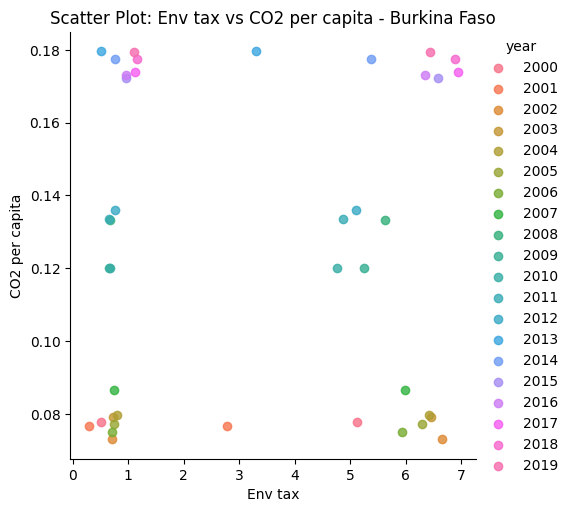

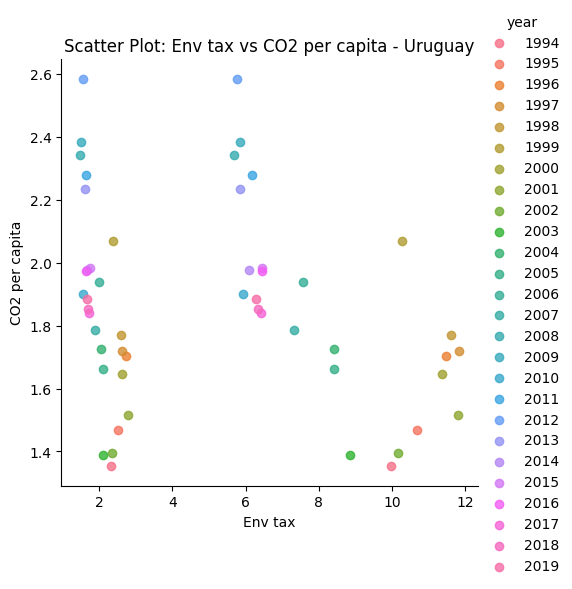

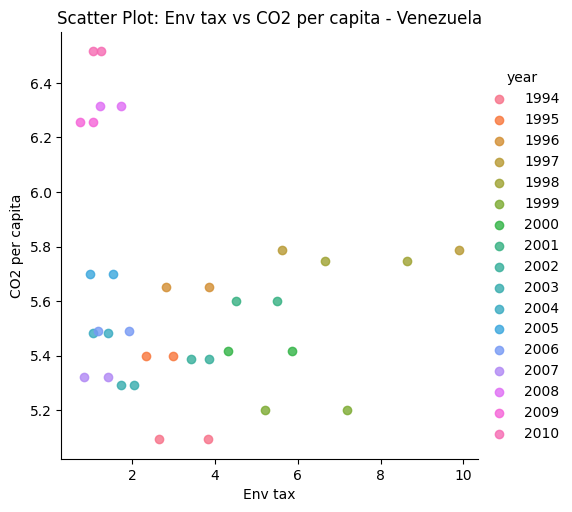

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your DataFrame df_data with the necessary columns
# If not, use your code to load df_data here

# Remove rows with missing values or zeros in any of the three columns
df_new = df_new[(df_new['Env tax'].notna()) & (df_new['Env tax'] != 0) &
                  (df_new['CO2 per capita'].notna()) & (df_new['CO2 per capita'] != 0)]

# Create separate scatter plots for each country
countries = df_new['country'].unique()

for country in countries:
    data_country = df_new[df_new['country'] == country]

    # Create a scatter plot for 'Env tax' and 'CO2 per capita' for the current country
    sns.lmplot(x='Env tax', y='CO2 per capita', data=data_country, hue='year', fit_reg=False)
    plt.title(f'Scatter Plot: Env tax vs CO2 per capita - {country}')


plt.show()


In [ ]:
pip install seaborn

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:181: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



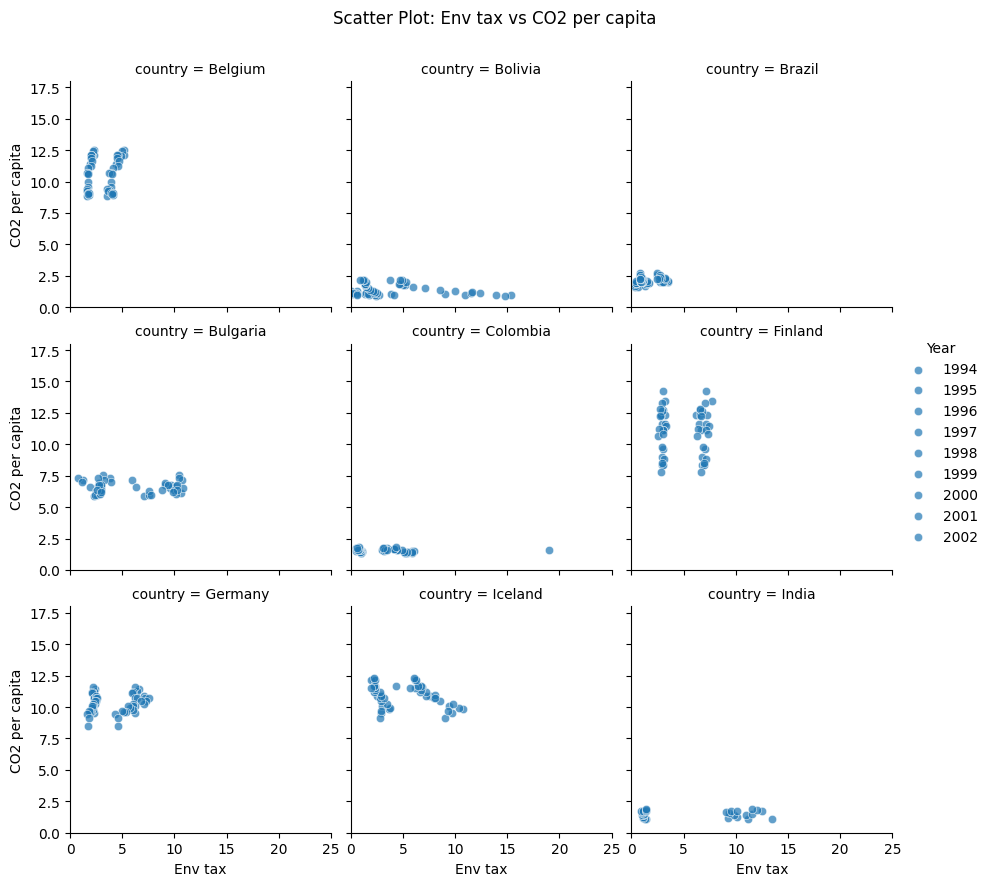

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

countries_of_interest = ['India', 'Iceland', 'Finland', 'Germany', 'Colombia', 'Bulgaria', 'Brazil', 'Bolivia', 'Belgium']
df_filtered = df_new[df_new['country'].isin(countries_of_interest)]

# Remove rows with missing values or zeros in any of the three columns
df_filtered = df_filtered[(df_filtered['Env tax'].notna()) & (df_filtered['Env tax'] != 0) &
                          (df_filtered['CO2 per capita'].notna()) & (df_filtered['CO2 per capita'] != 0)]

# Set a consistent axis scale
countries_of_interest = ['India', 'Iceland', 'Finland', 'Germany', 'Colombia', 'Bulgaria', 'Brazil', 'Bolivia', 'Belgium']
df_filtered = df_new[df_new['country'].isin(countries_of_interest)]

# Remove rows with missing values or zeros in any of the three columns
df_filtered = df_filtered[(df_filtered['Env tax'].notna()) & (df_filtered['Env tax'] != 0) &
                          (df_filtered['CO2 per capita'].notna()) & (df_filtered['CO2 per capita'] != 0)]

# Set a consistent axis scale
g = sns.FacetGrid(df_filtered, col='country', col_wrap=3)
g.map(sns.scatterplot, 'Env tax', 'CO2 per capita', alpha=0.7)
g.set(ylim=(0, 18))
g.set(xlim=(0, 25)) # Set the same y-axis scale for all plots
g.set_axis_labels('Env tax', 'CO2 per capita')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot: Env tax vs CO2 per capita')

g.add_legend(title='Year', labels=df_filtered['year'].unique())

plt.show()

NameError: ignored

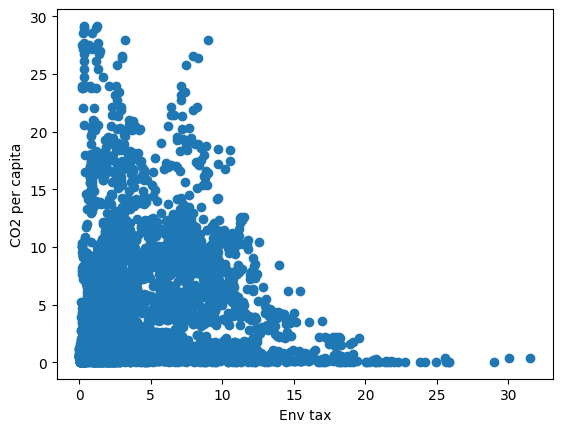

In [ ]:
plt.scatter(df_new['Env tax'], df_new['CO2 per capita'])
plt.xlabel('Env tax')
plt.ylabel('CO2 per capita')
plt.title(f'Scatter Plot: Env tax vs CO2 per capita\nCorrelation: {correlation_co2}')
plt.show()


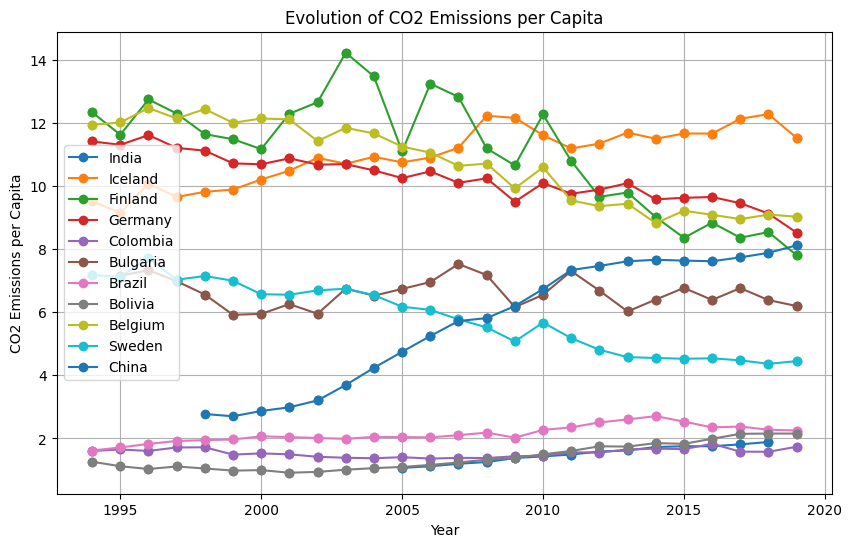

In [ ]:
#Explore CO2 emissions per countries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already loaded your DataFrame df_new with the necessary columns
# If not, use your code to load df_new here

# Filter the data to include only the countries of interest
countries_of_interest = ['India', 'Iceland', 'Finland', 'Germany', 'Colombia', 'Bulgaria', 'Brazil', 'Bolivia', 'Belgium', 'Sweden','China']
df_filtered = df_new[df_new['country'].isin(countries_of_interest)]

# Group by year and calculate the average CO2 per capita for each year
df_mean_CO2_capita = df_filtered.groupby('year')['CO2 per capita'].mean().reset_index()

plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['country'] == country]
    plt.plot(country_data['year'], country_data['CO2 per capita'], label=country, marker='o')

plt.title('Evolution of CO2 Emissions per Capita')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.legend()
plt.grid(True)
plt.show()

#world is average
#do for taxes



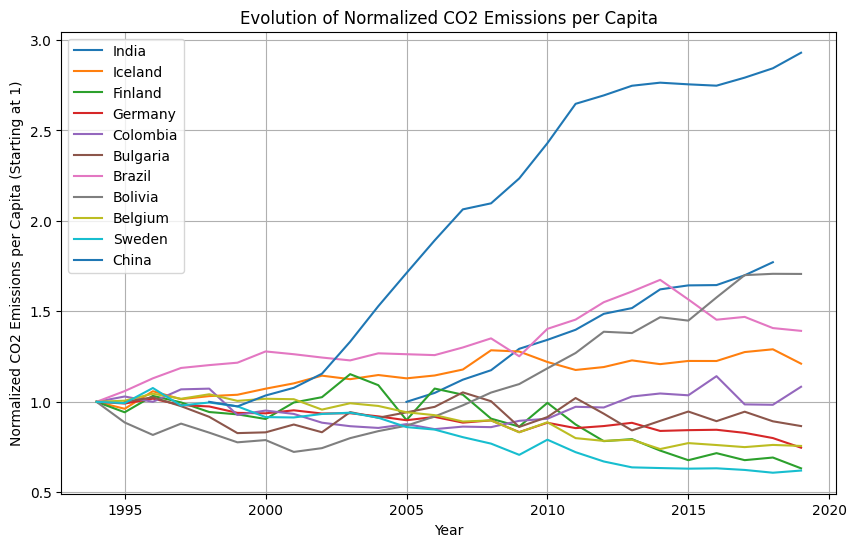

In [ ]:
countries_of_interest = ['India', 'Iceland', 'Finland', 'Germany', 'Colombia', 'Bulgaria', 'Brazil', 'Bolivia', 'Belgium', 'Sweden', 'China']

df_filtered = df_new[df_new['country'].isin(countries_of_interest)]

# Create a line plot for each country starting at 1
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['country'] == country]
    co2_values = country_data['CO2 per capita'] / country_data['CO2 per capita'].iloc[0]
    plt.plot(country_data['year'], co2_values, label=country)

plt.title('Evolution of Normalized CO2 Emissions per Capita')
plt.xlabel('Year')
plt.ylabel('Normalized CO2 Emissions per Capita (Starting at 1)')
plt.legend()
plt.grid(True)
plt.show()